In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [153]:
train_data=pd.read_csv('california_housing_train.csv')

In [154]:
train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [155]:
train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [156]:
train_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [157]:
if train_data.duplicated().any():
    print("Duplicates found!")
    train_data = train_data.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [158]:
print(train_data.columns)  

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [159]:
train_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

In [160]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


**1. longitude & latitude**

Definition: Geographic coordinates of the house location.

Use: Helps identify location-based price trends (e.g., coastal vs. inland houses).

**2. housing_median_age**

Definition: Median age of houses in the block (a group of houses in a neighborhood).

Use: Older areas might have lower/higher prices depending on renovations and demand.

**3. total_rooms**

Definition: Total number of rooms in all houses within the block.

Use: Needs to be normalized (e.g., rooms per household) since it's aggregated.

**4. total_bedrooms**
Definition: Total number of bedrooms in all houses within the block.

Use: Affects house value; should be normalized (e.g., bedrooms per household).

**5. population**

Definition: Total number of people living in the block.

Use: High population density could indicate demand but may also reduce livability.

**6. households**
Definition: Total number of households in the block.

Use: Can be used to calculate average household size (population/households).

**7. median_income**

Definition: Median household income in the block (scaled: actual value = this × 10,000).

Use: Strongest predictor of house price—higher income areas usually have expensive houses.

**8. median_house_value (Target Variable)**

Definition: Median price of houses in the block (in USD).

Use: This is what we are predicting!

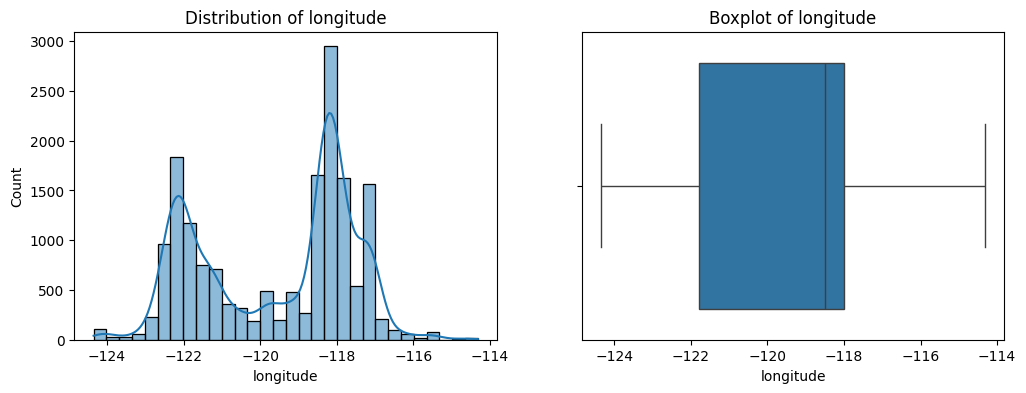

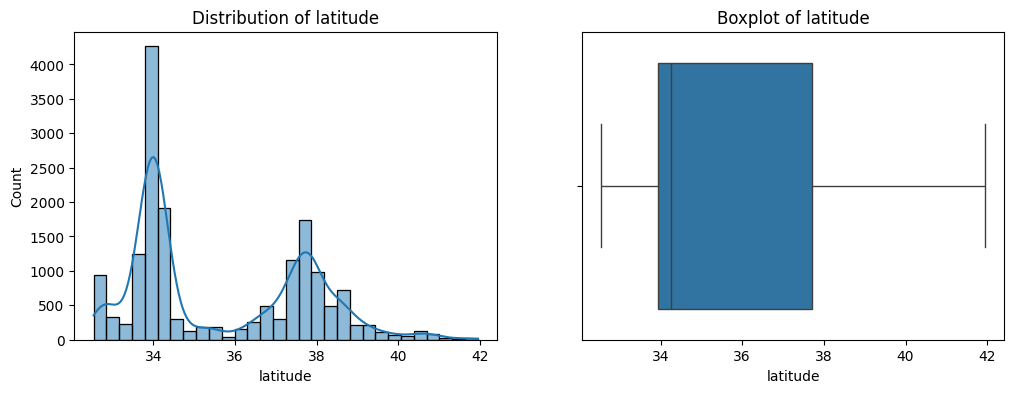

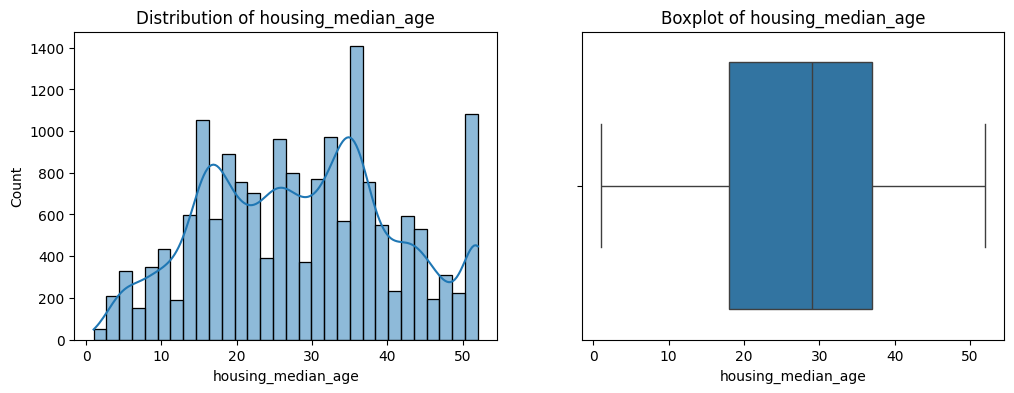

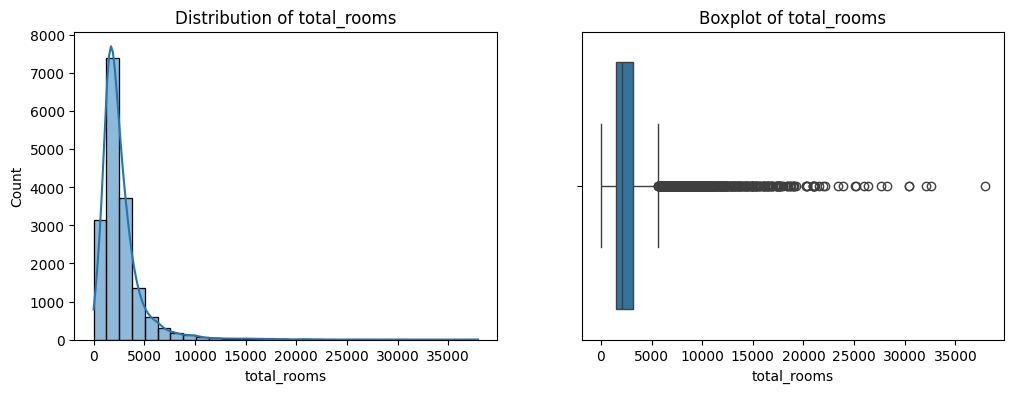

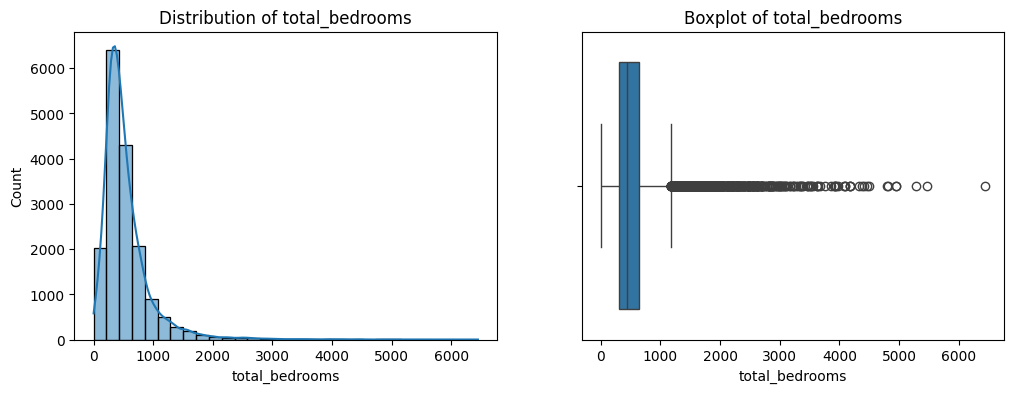

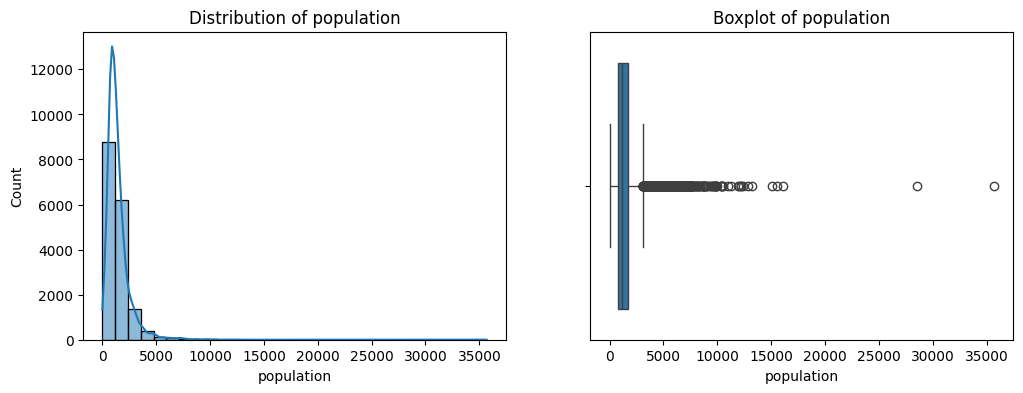

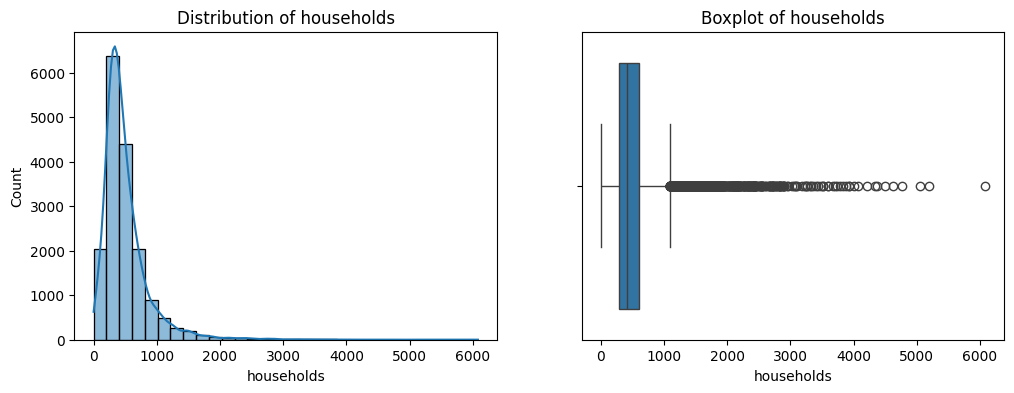

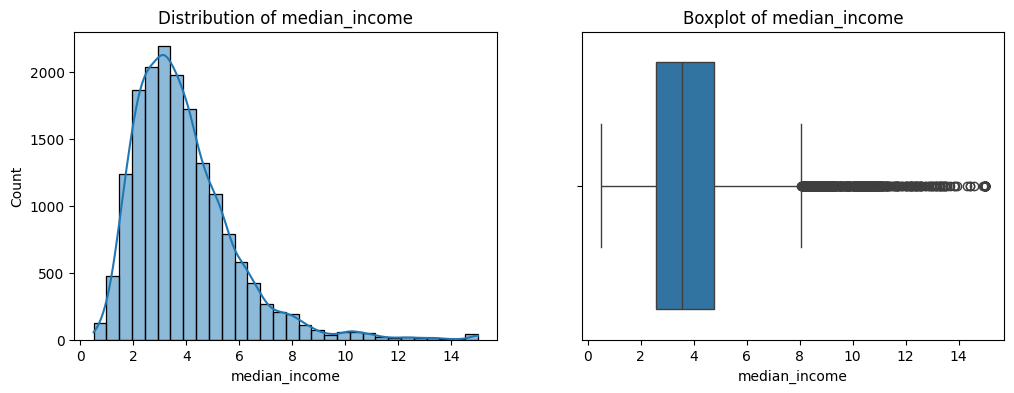

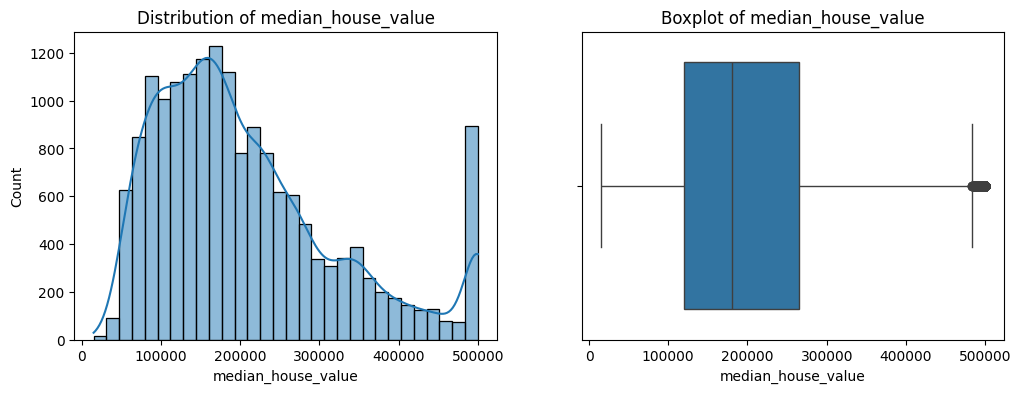

In [161]:
# Plot histograms and boxplots for each numeric feature
for col in train_data.columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

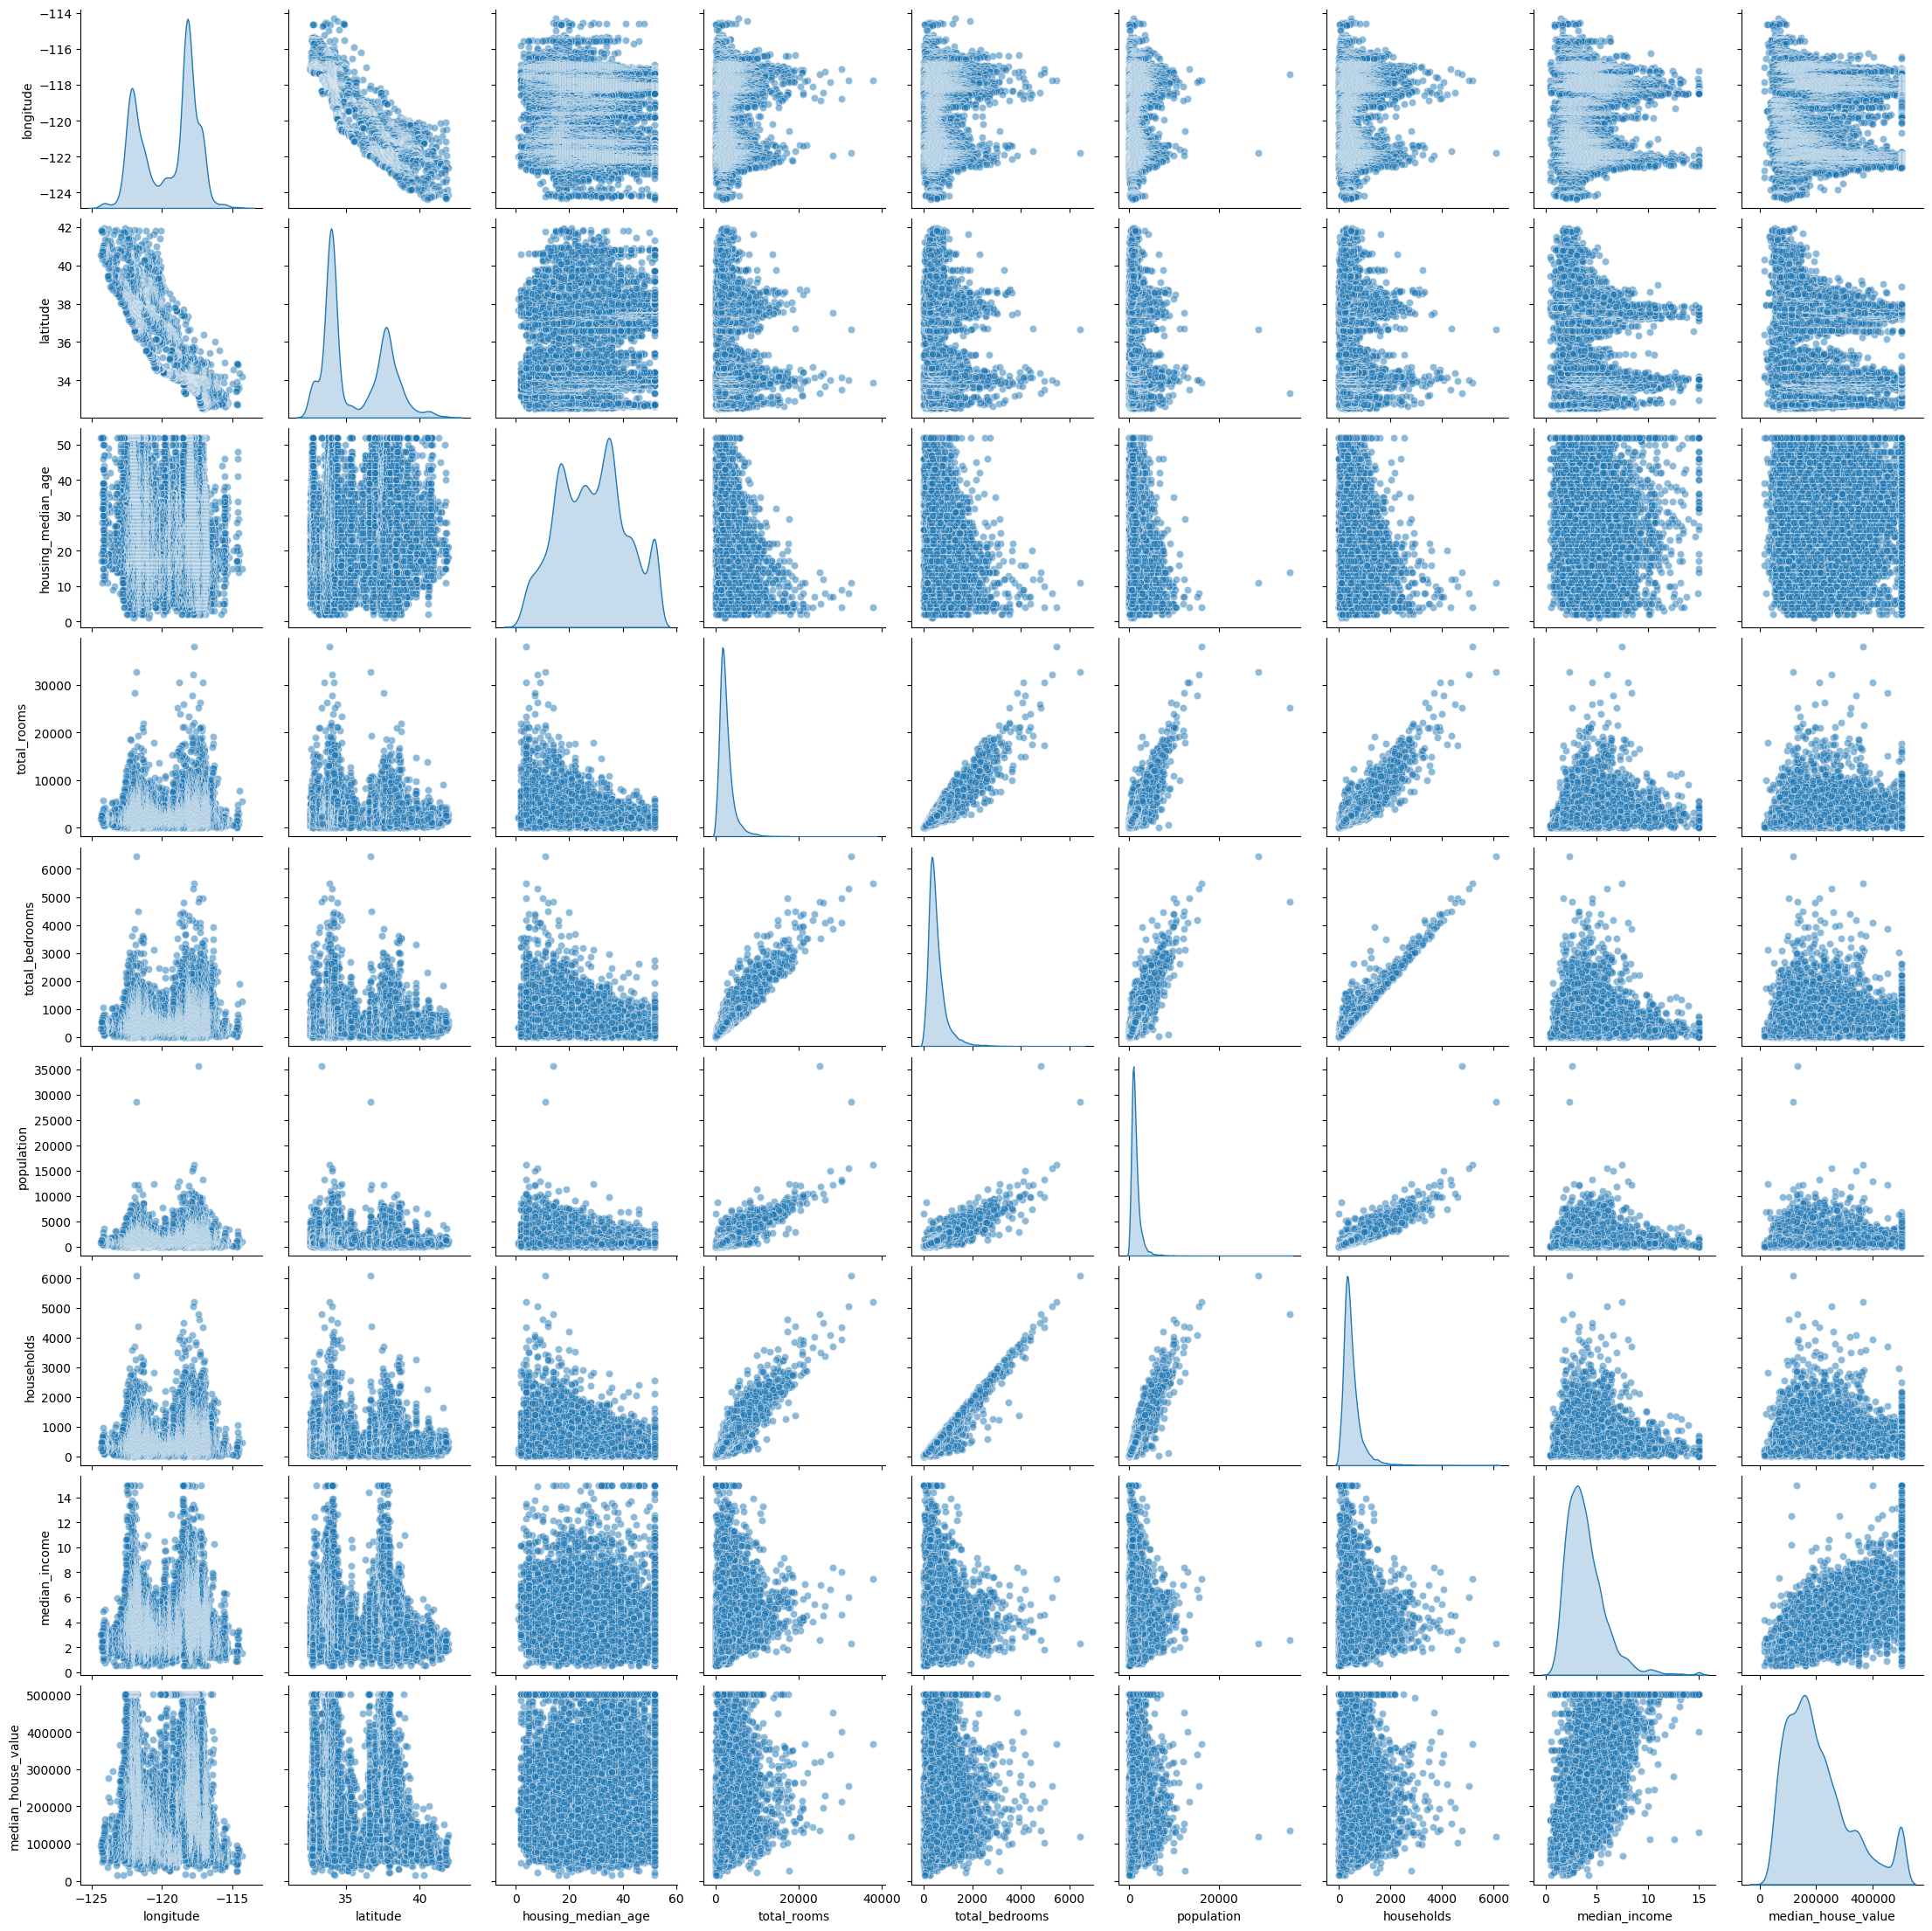

In [162]:
# Define the columns to visualize
columns = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income", "median_house_value"
]

# Pairplot to show bivariate relationships
sns.pairplot(train_data[columns], diag_kind="kde", plot_kws={'alpha':0.5})
plt.show()

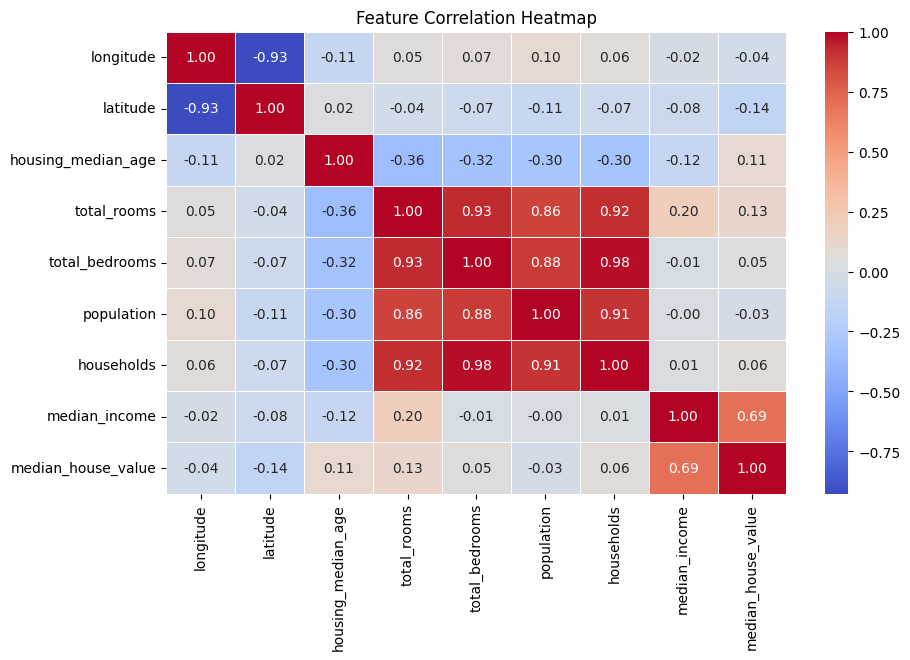

In [163]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_data[columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [164]:
# Compute correlation matrix
corr_matrix = train_data.corr()

# Print full correlation matrix
print("Full Correlation Matrix:\n", corr_matrix)

Full Correlation Matrix:
                     longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902 

 ***Insight on Outliers in Key Features***
 
From the boxplots, the following columns have many outliers:

total_rooms

total_bedrooms

population

households

median_income

These outliers suggest that some neighborhoods have extremely large houses, high population density, or very high incomes, which could skew model predictions.

**these outliers can be handled in few ways:**

Ratio features provide better interpretability.

Capping prevents extreme influence of outliers.

**we will be considering two datasets from now one with capped features another with feature engineered features**

In [11]:
train_data_capped=train_data
train_data_feature_engineered=train_data


In [12]:
#capped data
Q1 = train_data_capped.quantile(0.25)
Q3 = train_data_capped.quantile(0.75)
IQR = Q3 - Q1

# Capping outliers within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
train_data_capped = train_data_capped.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

In [13]:
from scipy import stats

z_scores = np.abs(stats.zscore(train_data_capped))
train_data_capped = train_data_capped[(z_scores < 3).all(axis=1)]

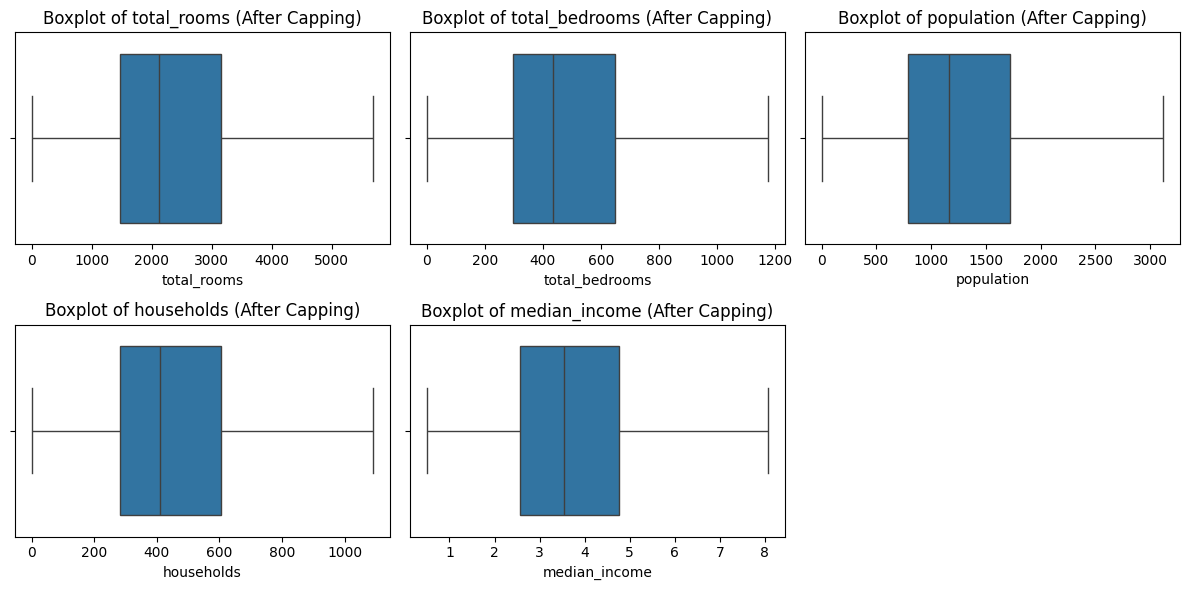

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns where outliers were handled
columns_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Plot boxplots after capping
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Create subplots (2 rows, 3 columns)
    sns.boxplot(x=train_data_capped[col])
    plt.title(f"Boxplot of {col} (After Capping)")

plt.tight_layout()
plt.show()

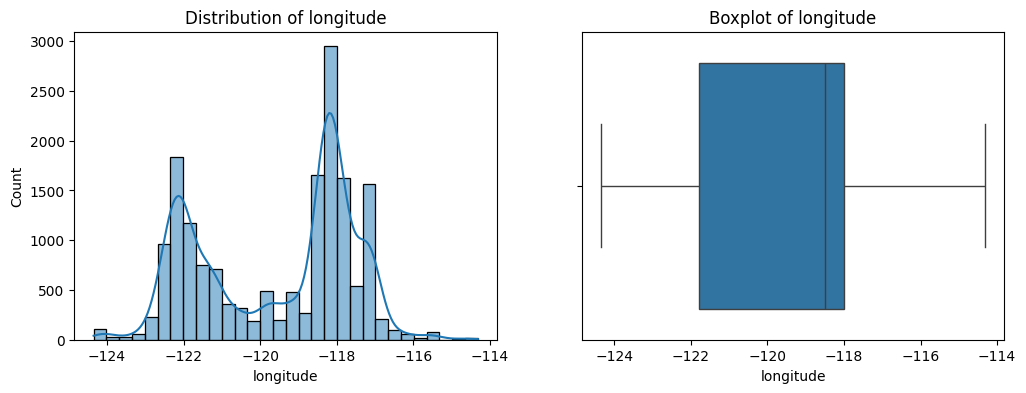

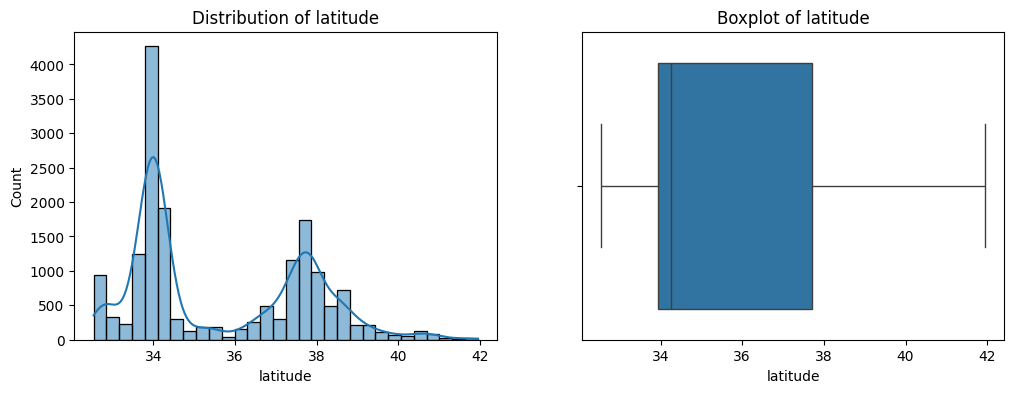

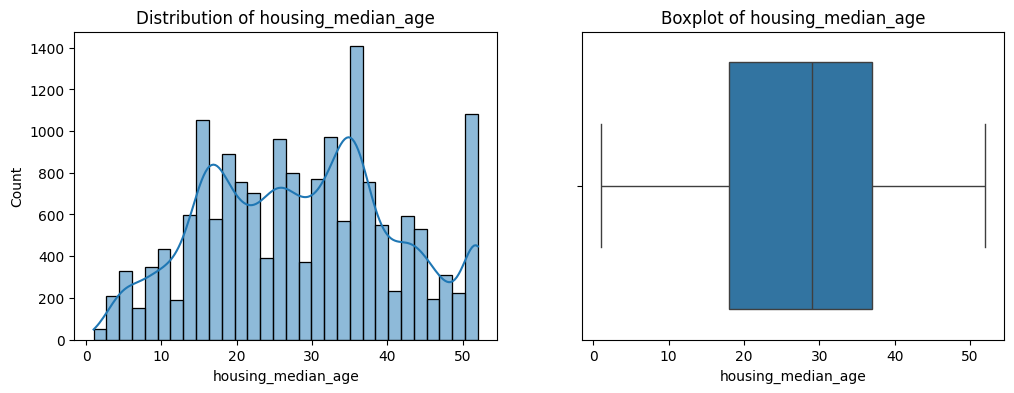

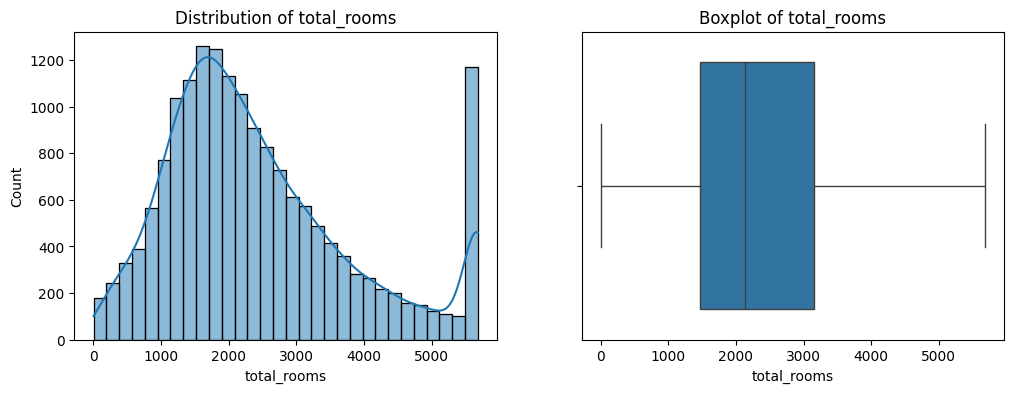

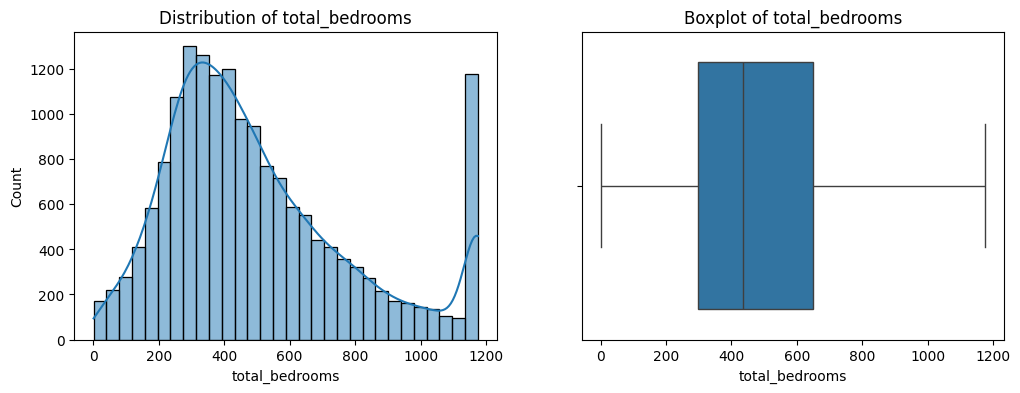

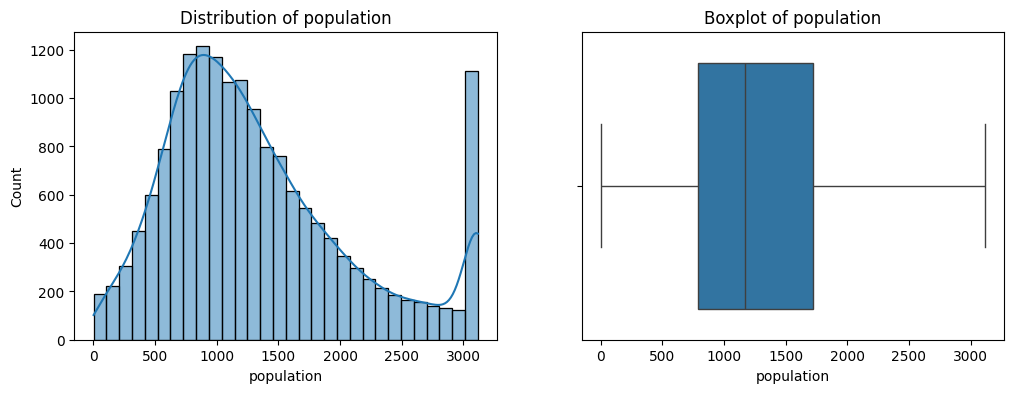

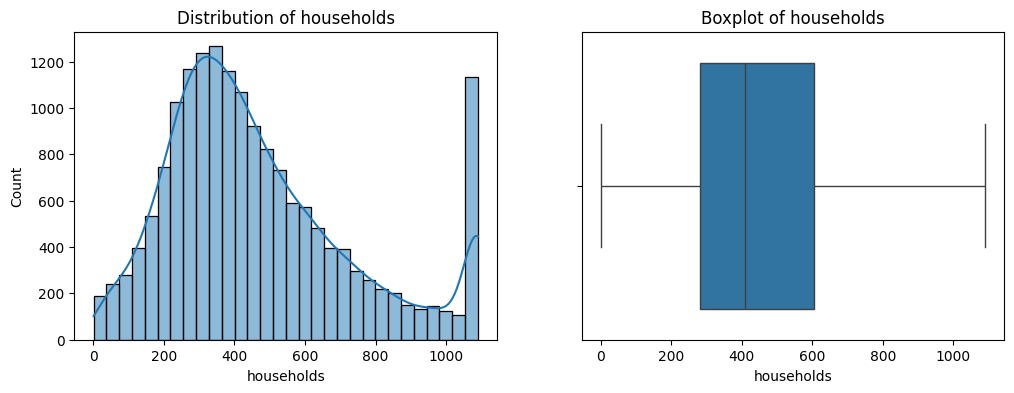

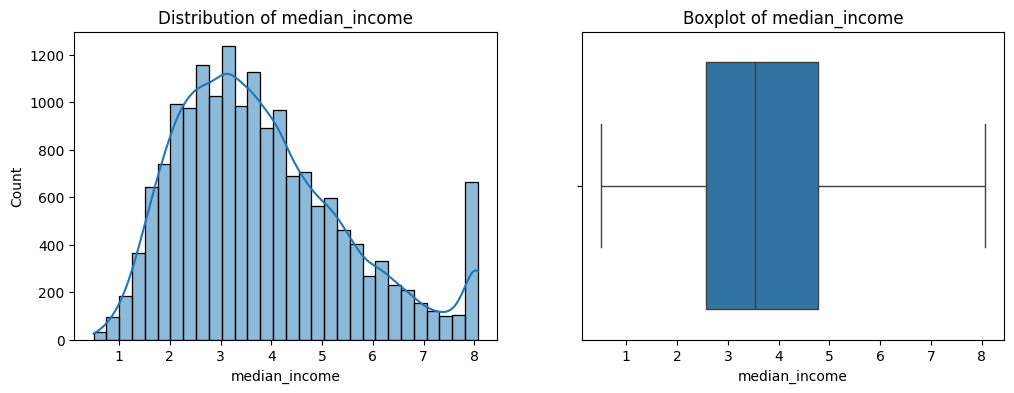

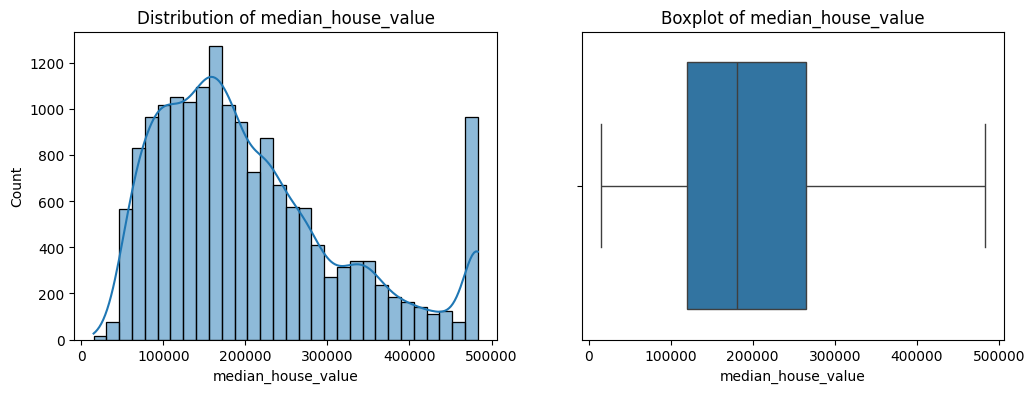

In [16]:
# Plot histograms and boxplots for each numeric feature
for col in train_data_capped.columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_data_capped[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data_capped[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

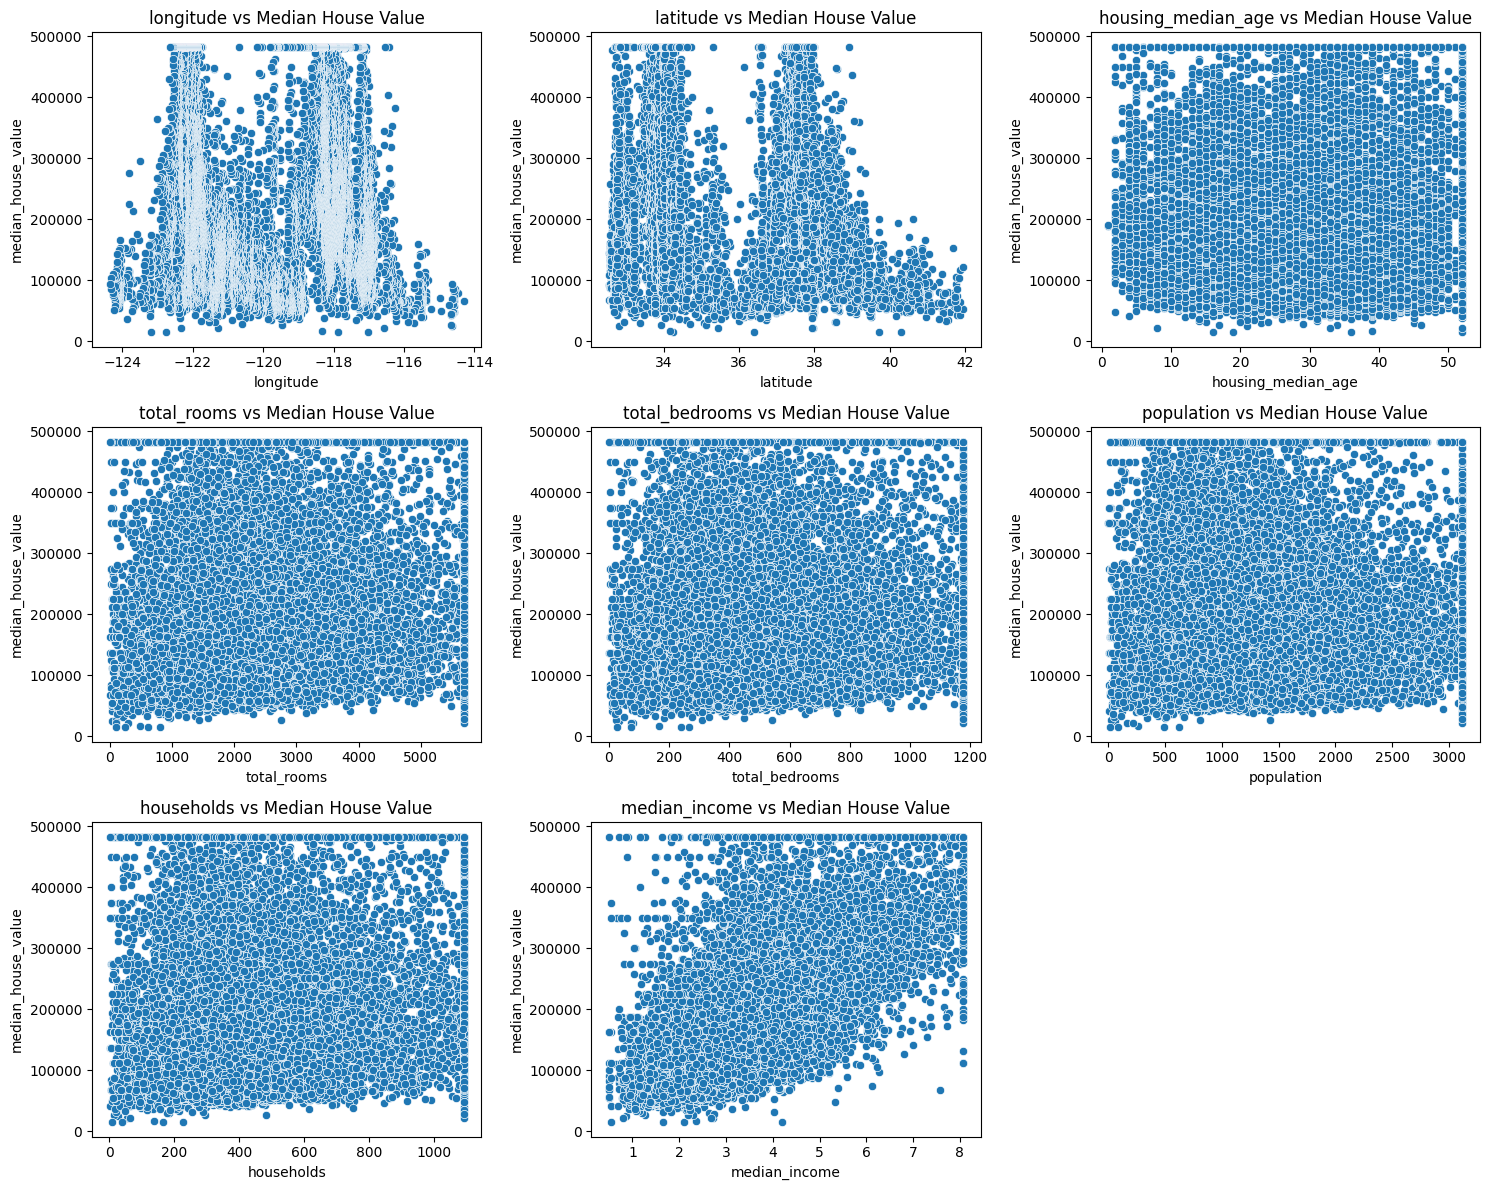

In [17]:
# List all numerical features except the target
features = train_data_capped.columns.tolist()
features.remove('median_house_value')

# Create scatterplots for all features
plt.figure(figsize=(15, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid size based on the number of features
    sns.scatterplot(x=train_data_capped[col], y=train_data_capped['median_house_value'])
    plt.title(f"{col} vs Median House Value")

plt.tight_layout()
plt.show()

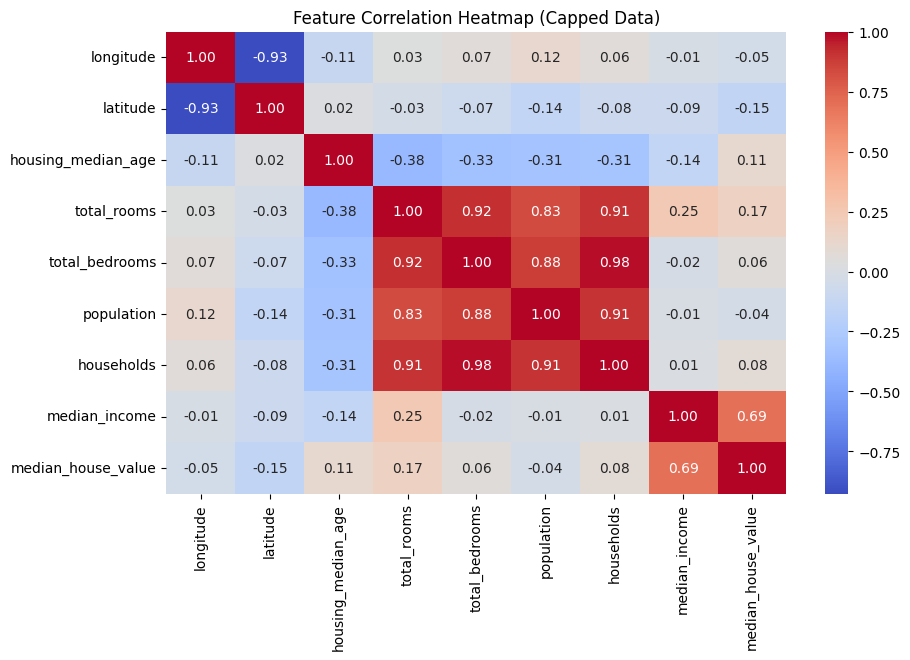

In [18]:

plt.figure(figsize=(10, 6))
sns.heatmap(train_data_capped.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap (Capped Data)")
plt.show()

In [19]:
correlation_matrix = train_data_capped.corr()

# Display the full correlation matrix
print(correlation_matrix)


                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.032809   
latitude            -0.925208  1.000000            0.016454    -0.030641   
housing_median_age  -0.114250  0.016454            1.000000    -0.380788   
total_rooms          0.032809 -0.030641           -0.380788     1.000000   
total_bedrooms       0.066938 -0.070377           -0.329307     0.917023   
population           0.120021 -0.136549           -0.308800     0.829825   
households           0.060368 -0.083695           -0.307222     0.909419   
median_income       -0.014525 -0.086071           -0.137610     0.246031   
median_house_value  -0.045257 -0.146230            0.105629     0.169898   

                    total_bedrooms  population  households  median_income  \
longitude                 0.066938    0.120021    0.060368      -0.014525   
latitude                 -0.070377   -0.136549   -0.083695      -0.086071   
housing_

**📊 Insights on train_data_capped Based on Correlation Analysis**

**1️⃣ Strong Positive Correlation with Target (median_house_value)**

median_income (0.69) is the most important predictor, showing a strong positive correlation with house prices.

Suggests that higher income areas tend to have higher house prices.

**2️⃣ Moderate Positive Correlation with Target**

total_rooms (0.17) and households (0.08) show a weak positive correlation, meaning larger homes may slightly contribute to house price increases.

housing_median_age (0.10) suggests older houses may have slightly higher prices, possibly due to location.

**3️⃣ Weak or Negligible Correlation with Target**

total_bedrooms (0.06) and population (-0.036) have almost no correlation with house prices, meaning raw counts of rooms/population may not impact prices directly.

Feature Engineering Idea: Convert raw counts into ratios (e.g., bedrooms_per_room, population_per_household).

**4️⃣ Strong Feature Interdependencies (Multicollinearity Risk)**

total_rooms, total_bedrooms, and households are highly correlated with each other (> 0.90).

Solution: Drop redundant features or create meaningful ratios like rooms_per_household.

**5️⃣ Geographic Influence on Prices**

longitude (-0.045) & latitude (-0.146) have weak correlations with house prices, indicating that location effects are complex.

Next Step: Apply clustering techniques or introduce categorical location-based features.

In [195]:
train_data_feature_engineered = train_data.copy()

# Create new ratio-based features
train_data_feature_engineered['rooms_per_household'] = train_data_feature_engineered['total_rooms'] / train_data_feature_engineered['households']
train_data_feature_engineered['population_per_household'] = train_data_feature_engineered['population'] / train_data_feature_engineered['households']

# Drop the original columns (optional)
train_data_feature_engineered.drop(columns=['total_rooms', 'population', 'households'], inplace=True)

# Display the updated feature set
train_data_feature_engineered.head()


longitude  latitude  housing_median_age  total_bedrooms  median_income  \
0    -114.31     34.19                15.0          1283.0         1.4936   
1    -114.47     34.40                19.0          1901.0         1.8200   
2    -114.56     33.69                17.0           174.0         1.6509   
3    -114.57     33.64                14.0           337.0         3.1917   
4    -114.57     33.57                20.0           326.0         1.9250   

   median_house_value  rooms_per_household  population_per_household  
0             66900.0            11.889831                  2.150424  
1             80100.0            16.522678                  2.438445  
2             85700.0             6.153846                  2.846154  
3             73400.0             6.641593                  2.278761  
4             65500.0             5.549618                  2.381679

**Improved Predictive Power**: The new ratio-based features (rooms_per_household and population_per_household) capture important relationships, helping the model understand household density and living conditions better.

**Reduced Redundancy**: Dropping the original columns (total_rooms, population, and households) prevents multicollinearity, ensuring the model focuses on unique, informative features.

**Better Generalization**: These engineered features can help the model generalize better by reducing noise and focusing on key factors affecting house prices.

In [196]:
# Define number of bins
num_bins = 5  

# Create categorical latitude and longitude bins
train_data_feature_engineered['lat_category'] = pd.cut(train_data['latitude'], bins=num_bins, labels=False)
train_data_feature_engineered['lon_category'] = pd.cut(train_data['longitude'], bins=num_bins, labels=False)

# One-hot encode the categories
train_data_feature_engineered = pd.get_dummies(train_data_feature_engineered, columns=['lat_category', 'lon_category'])

# Drop raw lat/lon
train_data_feature_engineered.drop(columns=['latitude', 'longitude'], inplace=True)

# Show sample results
train_data_feature_engineered.head()

housing_median_age  total_bedrooms  median_income  median_house_value  \
0                15.0          1283.0         1.4936             66900.0   
1                19.0          1901.0         1.8200             80100.0   
2                17.0           174.0         1.6509             85700.0   
3                14.0           337.0         3.1917             73400.0   
4                20.0           326.0         1.9250             65500.0   

   rooms_per_household  population_per_household  lat_category_0  \
0            11.889831                  2.150424            True   
1            16.522678                  2.438445            True   
2             6.153846                  2.846154            True   
3             6.641593                  2.278761            True   
4             5.549618                  2.381679            True   

   lat_category_1  lat_category_2  lat_category_3  lat_category_4  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   lon_category_0  lon_category_1  lon_category_2  lon_category_3  \
0           False           False           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False           False           False           False   

   lon_category_4  
0            True  
1            True  
2            True  
3            True  
4            True

1. **Categorizing Latitude and Longitude**: By binning the latitude and longitude into 5 categories, we capture geographical regions and create more meaningful features, which can improve model predictions based on location.

2. **One-Hot Encoding**: One-hot encoding the binned latitude and longitude categories transforms them into binary features, which allows the model to interpret categorical location data more effectively.

3. **Improved Geographical Representation**: Dropping the raw latitude and longitude helps the model focus on the encoded categorical data, simplifying location information while retaining its value.

In [197]:
import pandas as pd

# Compute correlation matrix
corr_matrix = train_data_feature_engineered.corr()

# Select correlation of location-based features
location_corr = pd.concat([
    corr_matrix.filter(like="lat_category_"),
    corr_matrix.filter(like="lon_category_")
])

# Add median_house_value correlation
location_corr["median_house_value"] = corr_matrix["median_house_value"]

# Display sorted correlation values
print(location_corr[["median_house_value"]].sort_values(by="median_house_value", ascending=False))


                          median_house_value
median_house_value                  1.000000
median_house_value                  1.000000
median_income                       0.691871
median_income                       0.691871
rooms_per_household                 0.150081
rooms_per_household                 0.150081
lat_category_0                      0.146330
lat_category_0                      0.146330
housing_median_age                  0.106758
housing_median_age                  0.106758
lon_category_0                      0.100700
lon_category_0                      0.100700
lat_category_2                      0.093763
lat_category_2                      0.093763
lon_category_2                      0.087828
lon_category_2                      0.087828
total_bedrooms                      0.045783
total_bedrooms                      0.045783
population_per_household           -0.042764
population_per_household           -0.042764
lon_category_3                     -0.048213
lon_catego

In [198]:
import pandas as pd

# Backup original lat/lon features before dropping
train_data_feature_engineered["lat_category_high"] = train_data_feature_engineered["lat_category_0"]
train_data_feature_engineered["lon_category_high"] = train_data_feature_engineered["lon_category_0"]

train_data_feature_engineered["lat_category_low"] = train_data_feature_engineered["lat_category_3"] + \
                                                    train_data_feature_engineered["lat_category_4"]
train_data_feature_engineered["lon_category_low"] = train_data_feature_engineered["lon_category_3"] + \
                                                    train_data_feature_engineered["lon_category_4"]

# Drop only the old categorical columns
lat_lon_cols = [col for col in train_data_feature_engineered.columns if "lat_category_" in col or "lon_category_" in col]
lat_lon_cols.remove("lat_category_high")
lat_lon_cols.remove("lon_category_high")
lat_lon_cols.remove("lat_category_low")
lat_lon_cols.remove("lon_category_low")

train_data_feature_engineered.drop(columns=lat_lon_cols, inplace=True)

# Debugging: Print columns after transformation
print("After transformation:", train_data_feature_engineered.columns)

# Show updated dataset
print(train_data_feature_engineered.head())


After transformation: Index(['housing_median_age', 'total_bedrooms', 'median_income',
       'median_house_value', 'rooms_per_household', 'population_per_household',
       'lat_category_high', 'lon_category_high', 'lat_category_low',
       'lon_category_low'],
      dtype='object')
   housing_median_age  total_bedrooms  median_income  median_house_value  \
0                15.0          1283.0         1.4936             66900.0   
1                19.0          1901.0         1.8200             80100.0   
2                17.0           174.0         1.6509             85700.0   
3                14.0           337.0         3.1917             73400.0   
4                20.0           326.0         1.9250             65500.0   

   rooms_per_household  population_per_household  lat_category_high  \
0            11.889831                  2.150424               True   
1            16.522678                  2.438445               True   
2             6.153846                  2.846

**Feature Combination**: By combining categories (lat_category_3 and lat_category_4, lon_category_3 and lon_category_4) into lat_category_low and lon_category_low, we aggregate information about lower geographical regions. This can help the model focus on broader geographic patterns, potentially improving predictive accuracy.

**Simplification and Focus**: Dropping the original categorical columns and keeping only high and low categories simplifies the feature set and reduces noise. This can lead to better generalization and improved model performance.

**Enhanced Geographic Segmentation**: Creating high and low geographical categories captures more relevant location-based patterns while reducing dimensionality, which can improve the model’s ability to detect regional trends.

In [199]:
# Convert boolean values to integers (0/1)
train_data_feature_engineered["lat_category_high"] = train_data_feature_engineered["lat_category_high"].astype(int)
train_data_feature_engineered["lon_category_high"] = train_data_feature_engineered["lon_category_high"].astype(int)
train_data_feature_engineered["lat_category_low"] = train_data_feature_engineered["lat_category_low"].astype(int)
train_data_feature_engineered["lon_category_low"] = train_data_feature_engineered["lon_category_low"].astype(int)

# Debug: Print updated dataset
print(train_data_feature_engineered.head())


   housing_median_age  total_bedrooms  median_income  median_house_value  \
0                15.0          1283.0         1.4936             66900.0   
1                19.0          1901.0         1.8200             80100.0   
2                17.0           174.0         1.6509             85700.0   
3                14.0           337.0         3.1917             73400.0   
4                20.0           326.0         1.9250             65500.0   

   rooms_per_household  population_per_household  lat_category_high  \
0            11.889831                  2.150424                  1   
1            16.522678                  2.438445                  1   
2             6.153846                  2.846154                  1   
3             6.641593                  2.278761                  1   
4             5.549618                  2.381679                  1   

   lon_category_high  lat_category_low  lon_category_low  
0                  0                 0                 1 

In [200]:
# Compute correlation matrix
corr_matrix = train_data_feature_engineered.corr()

# Filter correlation of new features with median_house_value
location_corr = corr_matrix.loc[["lat_category_high", "lon_category_high", "lat_category_low", "lon_category_low"], "median_house_value"]

# Display sorted correlation values
print(location_corr.sort_values(ascending=False))


lat_category_high    0.146330
lon_category_high    0.100700
lon_category_low    -0.072493
lat_category_low    -0.244437
Name: median_house_value, dtype: float64


In [201]:
# Drop weakly correlated feature
train_data_feature_engineered.drop(columns=["lon_category_low"], inplace=True)


In [211]:
train_data_feature_engineered.head()

housing_median_age  total_bedrooms  median_income  median_house_value  \
0                15.0          1283.0         1.4936             66900.0   
1                19.0          1901.0         1.8200             80100.0   
2                17.0           174.0         1.6509             85700.0   
3                14.0           337.0         3.1917             73400.0   
4                20.0           326.0         1.9250             65500.0   

   rooms_per_household  population_per_household  lat_category_high  \
0            11.889831                  2.150424                  1   
1            16.522678                  2.438445                  1   
2             6.153846                  2.846154                  1   
3             6.641593                  2.278761                  1   
4             5.549618                  2.381679                  1   

   lon_category_high  lat_category_low  
0                  0                 0  
1                  0                 0  
2                  0                 0  
3                  0                 0  
4                  0                 0

In [212]:
train_data_feature_engineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        17000 non-null  float64
 1   total_bedrooms            17000 non-null  float64
 2   median_income             17000 non-null  float64
 3   median_house_value        17000 non-null  float64
 4   rooms_per_household       17000 non-null  float64
 5   population_per_household  17000 non-null  float64
 6   lat_category_high         17000 non-null  int32  
 7   lon_category_high         17000 non-null  int32  
 8   lat_category_low          17000 non-null  int32  
dtypes: float64(6), int32(3)
memory usage: 996.2 KB


In [213]:
train_data_feature_engineered.describe()

housing_median_age  total_bedrooms  median_income  median_house_value  \
count        17000.000000    17000.000000   17000.000000        17000.000000   
mean            28.589353      539.410824       3.883578       207300.912353   
std             12.586937      421.499452       1.908157       115983.764387   
min              1.000000        1.000000       0.499900        14999.000000   
25%             18.000000      297.000000       2.566375       119400.000000   
50%             29.000000      434.000000       3.544600       180400.000000   
75%             37.000000      648.250000       4.767000       265000.000000   
max             52.000000     6445.000000      15.000100       500001.000000   

       rooms_per_household  population_per_household  lat_category_high  \
count         17000.000000              17000.000000       17000.000000   
mean              5.439044                  2.976337           0.524529   
std               2.539196                  4.037838           0.499413   
min               0.846154                  0.692308           0.000000   
25%               4.445275                  2.432609           0.000000   
50%               5.236106                  2.816872           1.000000   
75%               6.058097                  3.279435           1.000000   
max             141.909091                502.461538           1.000000   

       lon_category_high  lat_category_low  
count       17000.000000      17000.000000  
mean            0.083059          0.127176  
std             0.275979          0.333180  
min             0.000000          0.000000  
25%             0.000000          0.000000  
50%             0.000000          0.000000  
75%             0.000000          0.000000  
max             1.000000          1.000000

In [ ]:
'''
univariate analysis
'''

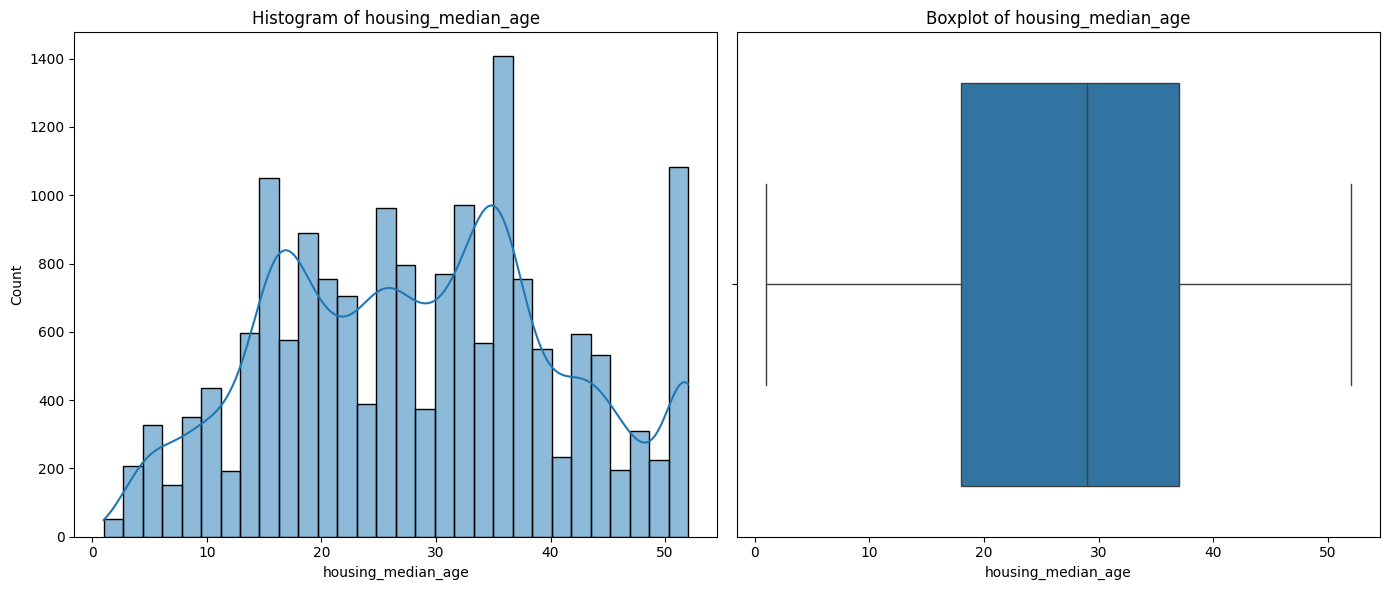

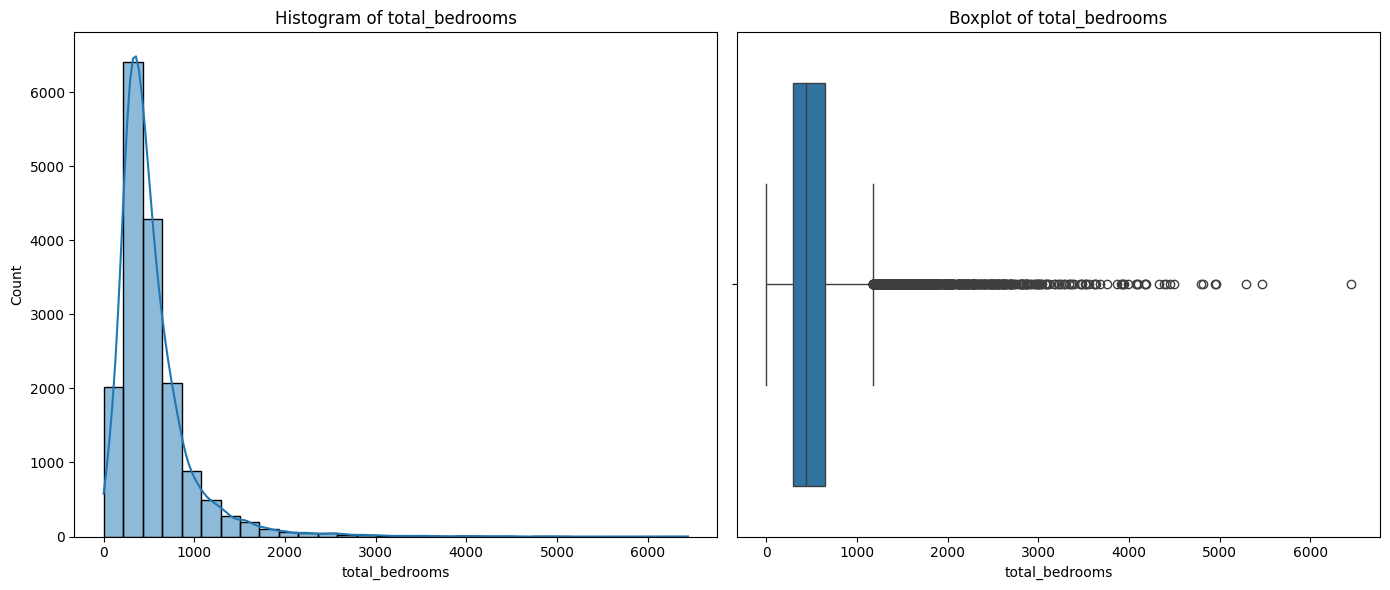

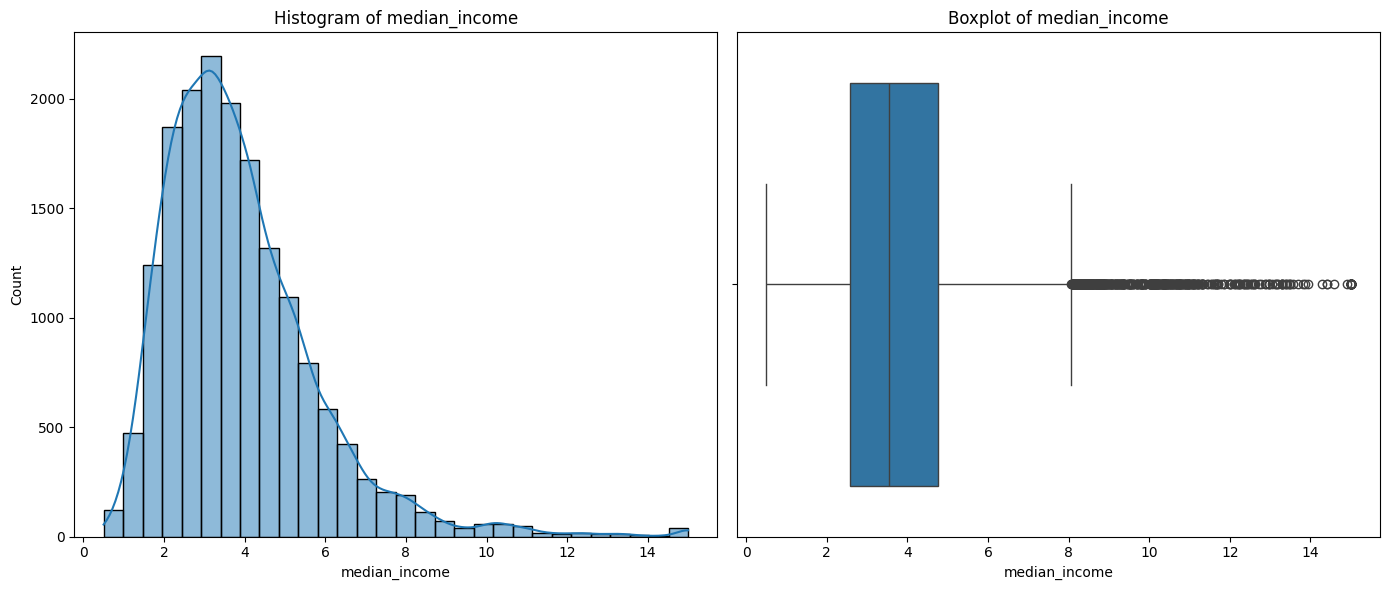

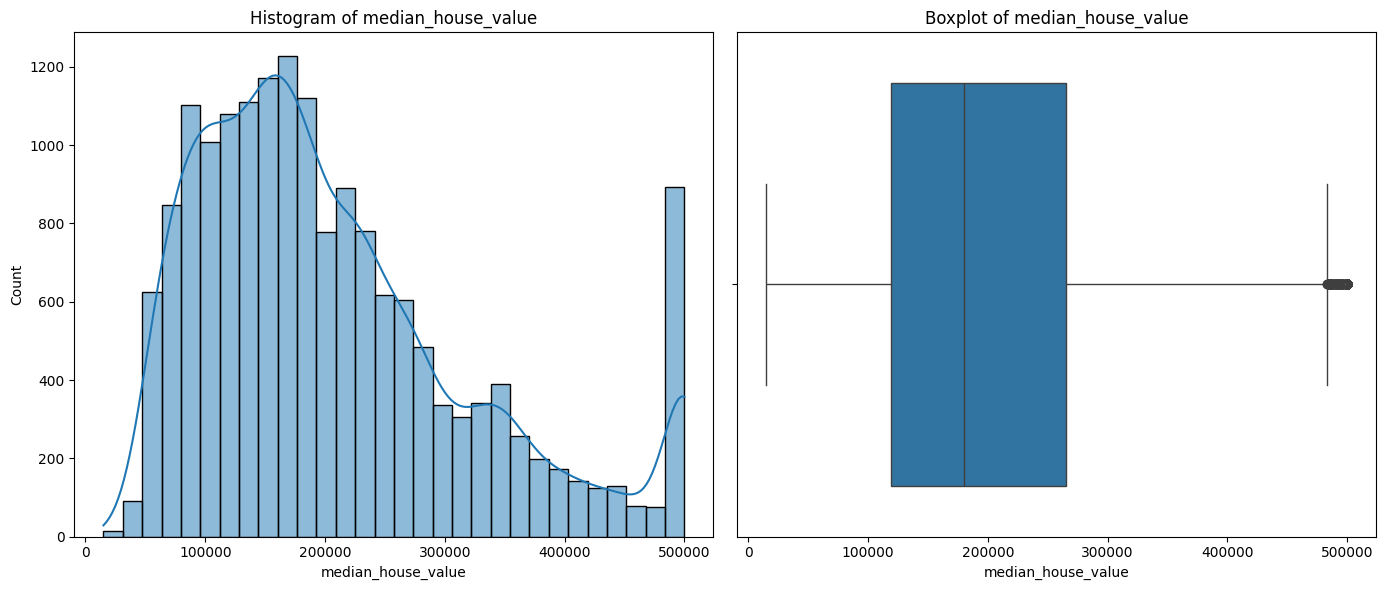

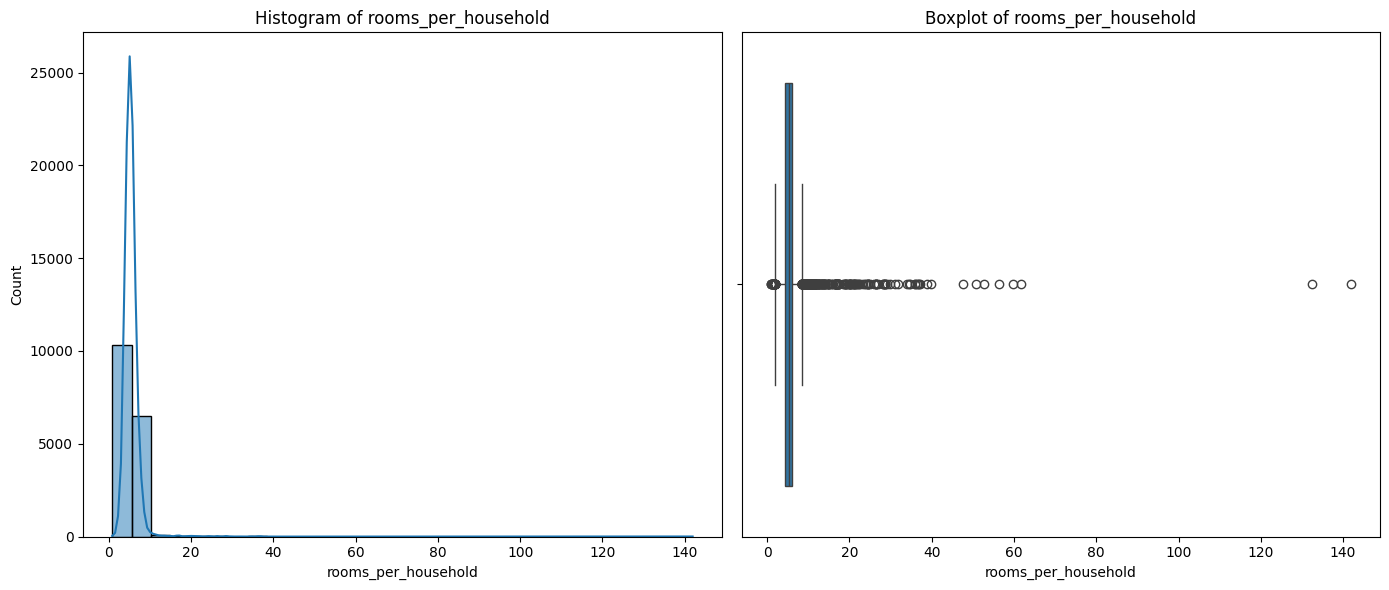

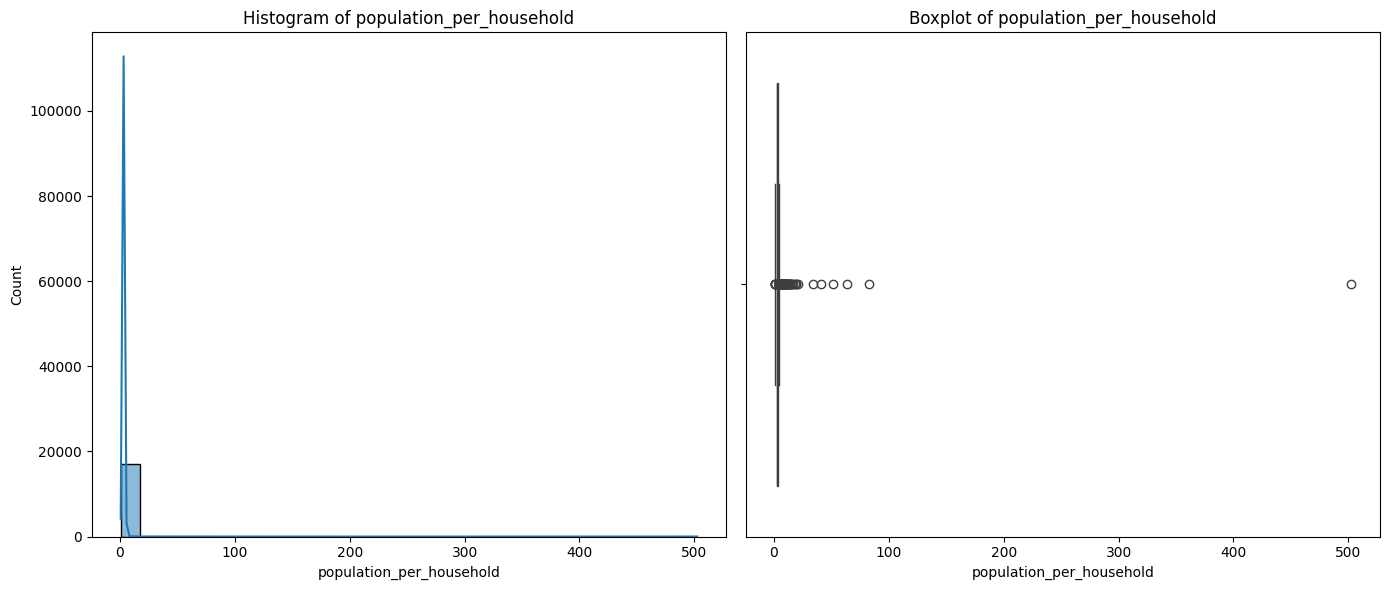

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Distribution of each feature (histogram and box plot)
numerical_cols = train_data_feature_engineered.select_dtypes(include=['float64', 'int64']).columns

# Plot histogram and box plot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_data_feature_engineered[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_data_feature_engineered[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


In [ ]:
'''
bivariate analysis
'''

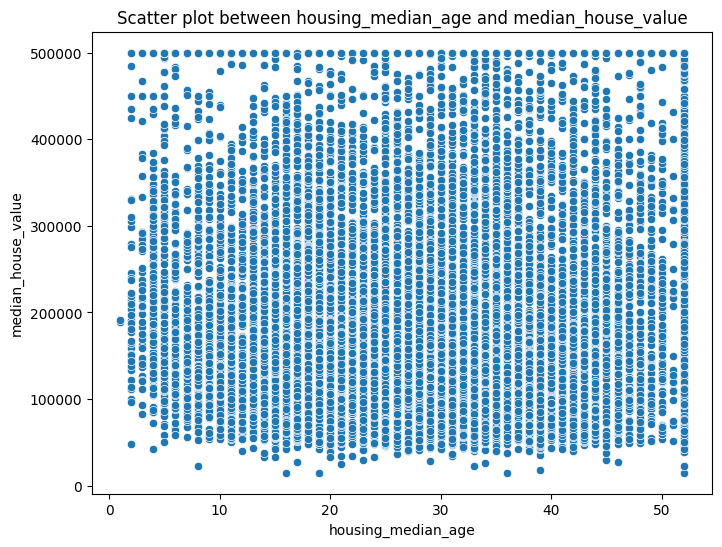

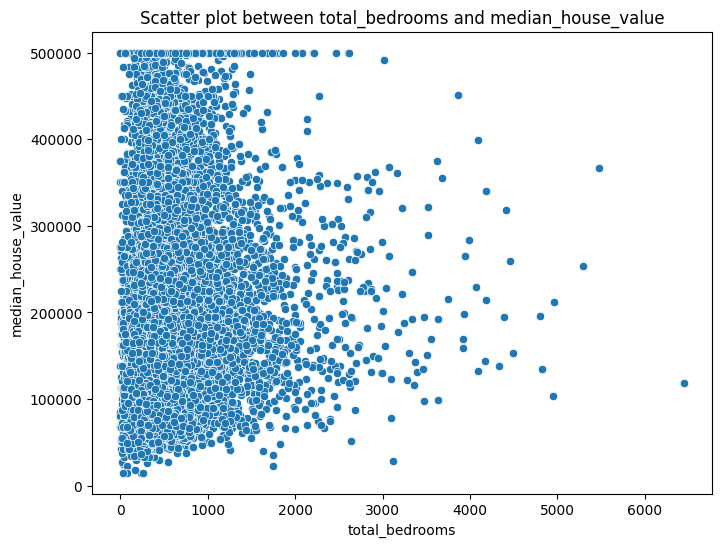

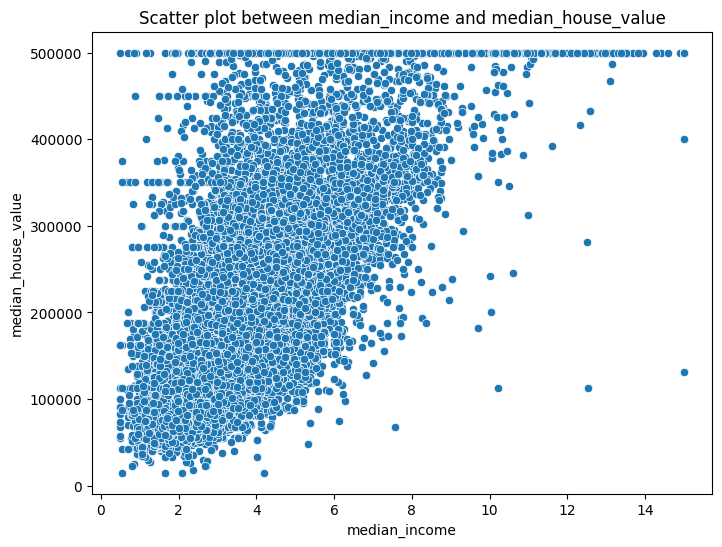

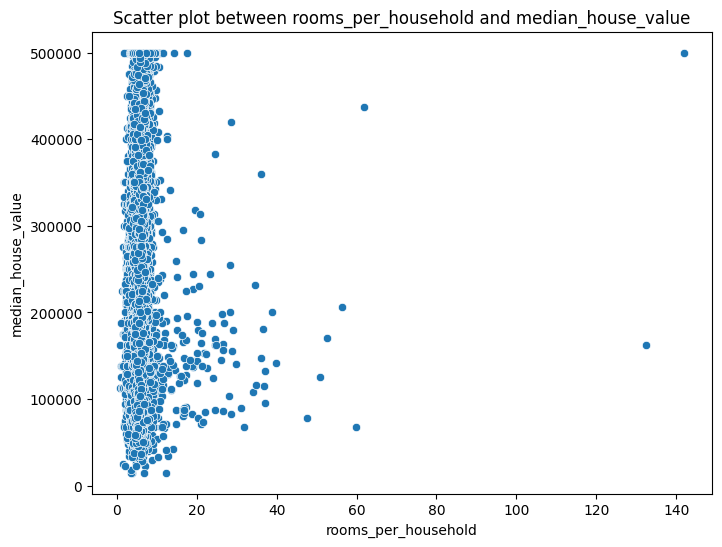

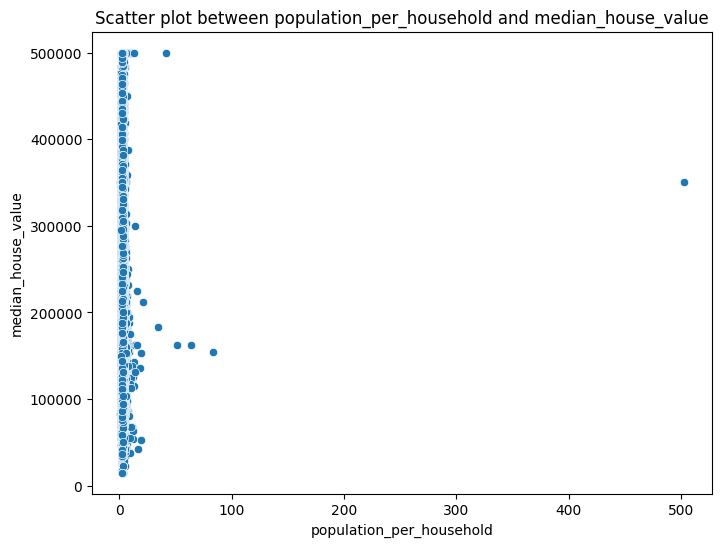

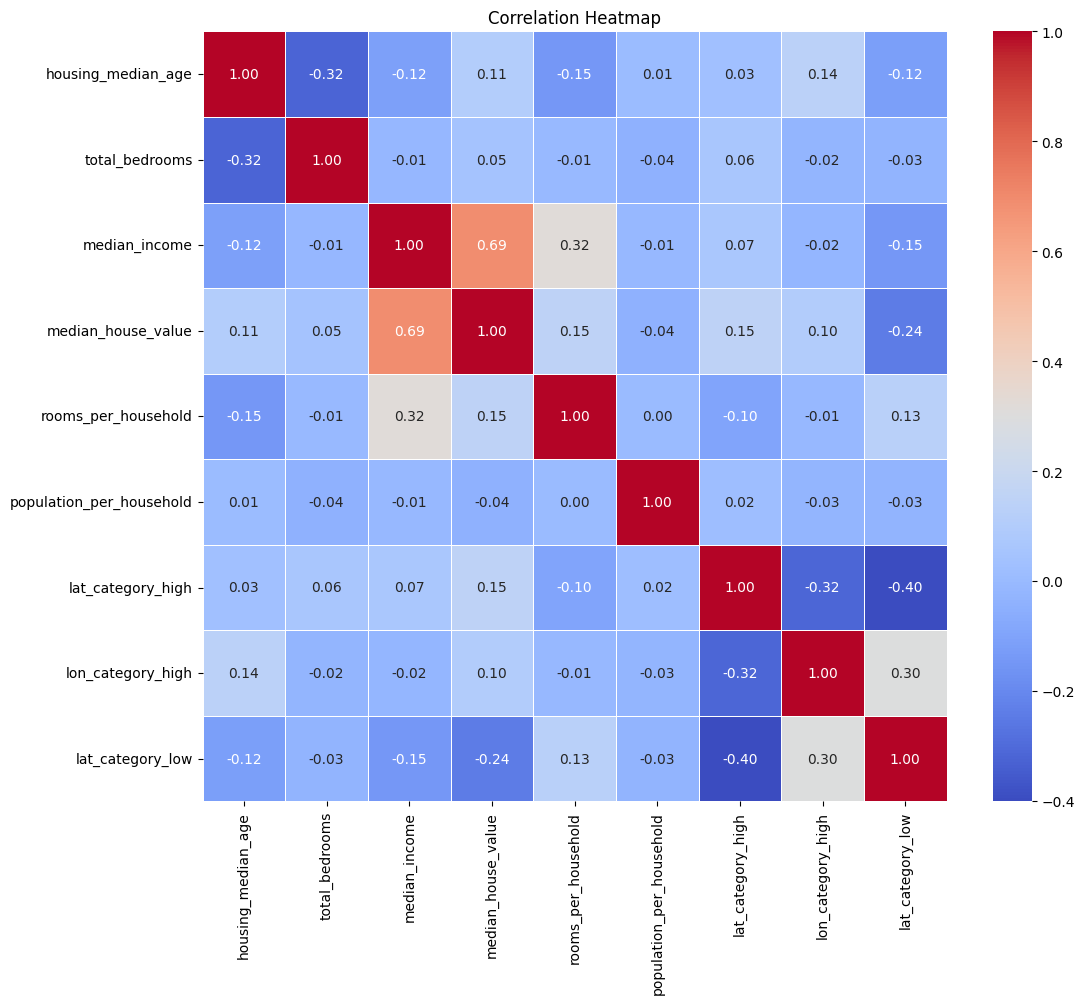

In [215]:
# Bivariate Analysis: Scatter plot for two features and Correlation heatmap
# Choose a target variable like 'median_house_value' for analysis
target_col = 'median_house_value'

# Plotting scatter plots between target and other features
for col in numerical_cols:
    if col != target_col:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=train_data_feature_engineered[col], y=train_data_feature_engineered[target_col])
        plt.title(f'Scatter plot between {col} and {target_col}')
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.show()

# Correlation heatmap between features
corr_matrix = train_data_feature_engineered.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
'''
multivariate analysis
'''

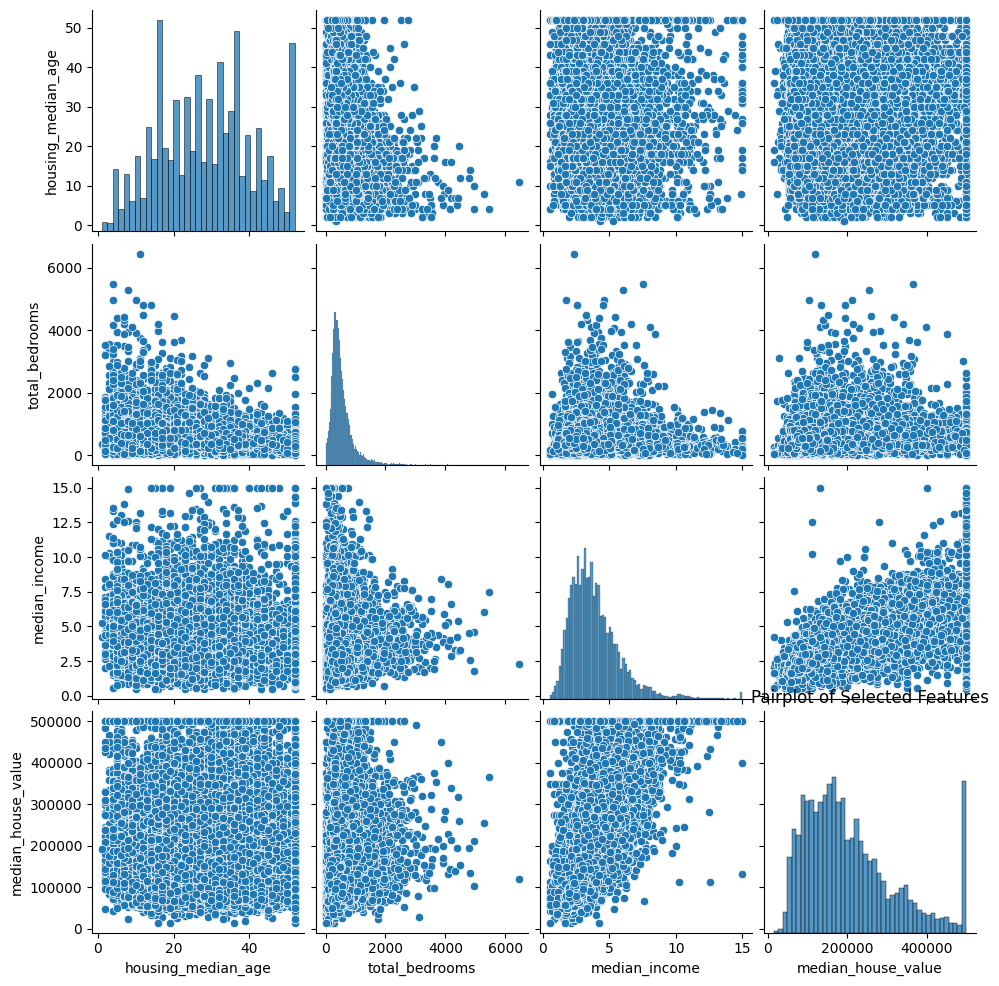

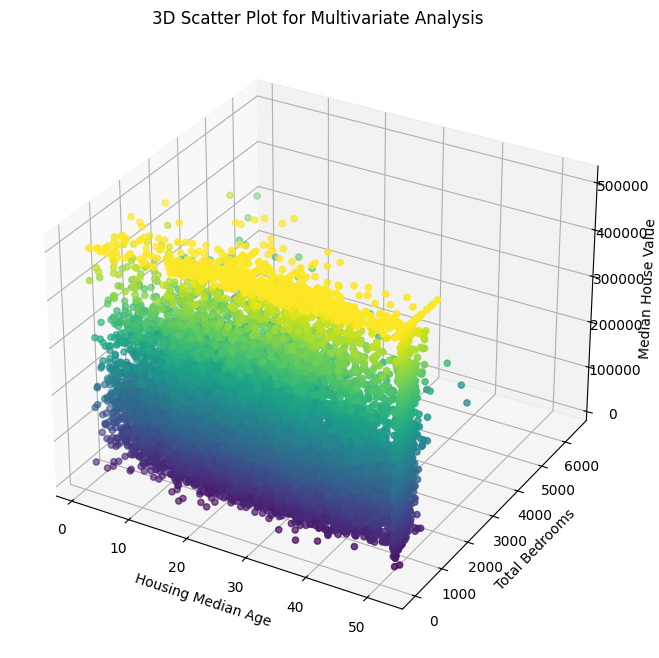

In [216]:
# Multivariate Analysis: Pairplot for a subset of variables
# Select a subset of variables for multivariate analysis
subset_cols = ['housing_median_age', 'total_bedrooms', 'median_income', 'median_house_value']

# Pairplot for multivariate relationships
sns.pairplot(train_data_feature_engineered[subset_cols])
plt.title('Pairplot of Selected Features')
plt.show()

# If you want to use 3D scatter plot for more than 2 variables
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Example: 3D scatter plot for 'housing_median_age', 'total_bedrooms', and 'median_house_value'
ax.scatter(train_data_feature_engineered['housing_median_age'],
           train_data_feature_engineered['total_bedrooms'],
           train_data_feature_engineered['median_house_value'],
           c=train_data_feature_engineered['median_house_value'], cmap='viridis')

ax.set_xlabel('Housing Median Age')
ax.set_ylabel('Total Bedrooms')
ax.set_zlabel('Median House Value')
plt.title('3D Scatter Plot for Multivariate Analysis')
plt.show()


                          housing_median_age  total_bedrooms  median_income  \
housing_median_age                  1.000000       -0.320434      -0.115932   
total_bedrooms                     -0.320434        1.000000      -0.013495   
median_income                      -0.115932       -0.013495       1.000000   
median_house_value                  0.106758        0.045783       0.691871   
rooms_per_household                -0.146234       -0.006480       0.317311   
population_per_household            0.006274       -0.043553      -0.009826   
lat_category_high                   0.026622        0.061742       0.069683   
lon_category_high                   0.139946       -0.024568      -0.022597   
lat_category_low                   -0.119067       -0.029927      -0.146449   

                          median_house_value  rooms_per_household  \
housing_median_age                  0.106758            -0.146234   
total_bedrooms                      0.045783            -0.006480   
me

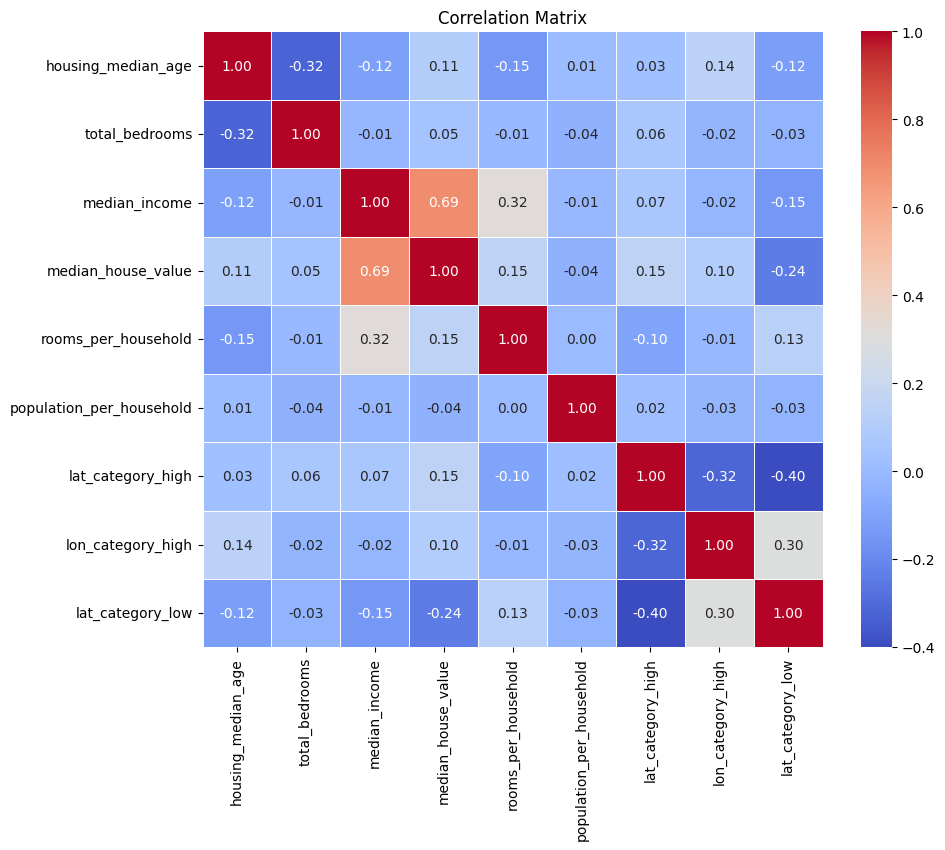

In [228]:
# Calculate the correlation matrix
correlation_matrix = train_data_feature_engineered.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, plot the correlation matrix using a heatmap (requires seaborn and matplotlib)
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Strong Positive Correlation:**

Median Income and Median House Value: There is a strong positive correlation (0.69), which suggests that higher median incomes tend to correlate with higher house values.

**Moderate Positive Correlation:**

Rooms per Household and Median House Value: A moderate positive correlation (0.15) suggests that more rooms per household may be associated with higher house prices.

**Negative Correlation between Population per Household and Median House Value:**

The correlation (-0.04) indicates a very weak negative relationship, suggesting that more people per household might slightly decrease the median house value.

**Negative Correlation with Latitude/Longitude Categories:**

Latitude/Longitude Categories: Both lat_category_low and lon_category_low have negative correlations with the target variable median_house_value, with the lowest being lat_category_low (-0.24), suggesting that areas in lower latitude/longitude categories may have lower house values.

**Weak or No Correlation with Certain Variables:**

Total Bedrooms and Median House Value: The correlation (0.05) is weak, indicating that total number of bedrooms doesn’t have a significant effect on house prices.

Population per Household and Other Features: There is minimal correlation with most of the other features, particularly with rooms_per_household and lat_category_high.

**Weak Negative Correlation with Housing Median Age:**

Housing Median Age shows a weak negative correlation with rooms_per_household (-0.15), which suggests that older houses might have fewer rooms per household on average.

**Effect of Geographical Location:**

Geographical Categories (Lat/Lon): The geographical bins, such as lat_category_high and lon_category_high, show weak to moderate correlations with house prices, indicating that location (latitude and longitude) could play a role in predicting house values, though it's not the strongest factor.

In [203]:


# Define features and target
X = train_data_feature_engineered.drop(columns=["median_house_value"])
y = train_data_feature_engineered["median_house_value"]

# Split into Training (80%) and CV (20%) sets
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape}")
print(f"CV Set Size: {X_cv.shape}")


Training Set Size: (13600, 8)
CV Set Size: (3400, 8)


In [207]:
# Function to calculate error metrics
def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_cv, y_cv, model_name):
    pipeline = Pipeline([
        ("scaler", StandardScaler()),  # Standardization
        ("regressor", model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predictions on Training set
    y_train_pred = pipeline.predict(X_train)
    
    # Predictions on CV set
    y_cv_pred = pipeline.predict(X_cv)
    
    # Compute errors
    train_mae, train_mse, train_rmse, train_r2 = get_metrics(y_train, y_train_pred)
    cv_mae, cv_mse, cv_rmse, cv_r2 = get_metrics(y_cv, y_cv_pred)
    
    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Training Set -> MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
    print(f"CV Set      -> MAE: {cv_mae:.4f}, MSE: {cv_mse:.4f}, RMSE: {cv_rmse:.4f}, R²: {cv_r2:.4f}")

# Train & evaluate models
train_and_evaluate(LinearRegression(), X_train, y_train, X_cv, y_cv, "Linear Regression")
train_and_evaluate(Lasso(alpha=0.1), X_train, y_train, X_cv, y_cv, "Lasso Regression")


Linear Regression Performance:
Training Set -> MAE: 56977.5123, MSE: 5898535077.4935, RMSE: 76801.9211, R²: 0.5588
CV Set      -> MAE: 56064.0514, MSE: 5626194258.7367, RMSE: 75007.9613, R²: 0.5917

Lasso Regression Performance:
Training Set -> MAE: 56977.5161, MSE: 5898535077.5777, RMSE: 76801.9211, R²: 0.5588
CV Set      -> MAE: 56064.0609, MSE: 5626197139.8124, RMSE: 75007.9805, R²: 0.5917


**Insights:**

1. **Similar Performance**: The performance of Linear Regression and Lasso Regression on both the training and CV sets is almost identical, indicating that the Lasso model is performing similarly to Linear Regression.

2. **Better Generalization with Lasso**: Although the training errors are identical, the Lasso model shows slightly better generalization with a marginally lower CV error (MAE). This suggests that Lasso is slightly more robust to overfitting compared to the Linear Regression model.

3. **Consistent R² Values**: Both models show an R² value of around 0.5588 on the training set, but Lasso's performance on the CV set is slightly better, with an R² value of 0.5917. This indicates that Lasso is better at capturing the variability in the data and generalizing to unseen data.

4. **Minimal Impact of Regularization**: The minimal difference between the training and CV errors indicates that the Lasso regularization has not overly penalized the model's performance, which means it has struck a good balance between complexity and fitting the data well.

***hyperparameter tuning in lasso***

In [230]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define Lasso model
lasso = Lasso()

# Set up a range of values for alpha (regularization strength)
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 200]}

# Set up GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best alpha and corresponding results
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best CV Score (Negative MSE): {grid_search.best_score_}")

# Get the model with the best alpha
best_lasso = grid_search.best_estimator_

# Train error (on training set)
y_train_pred = best_lasso.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# CV error (on CV set)
y_cv_pred = best_lasso.predict(X_cv)
cv_mae = mean_absolute_error(y_cv, y_cv_pred)
cv_mse = mean_squared_error(y_cv, y_cv_pred)
cv_rmse = np.sqrt(cv_mse)
cv_r2 = r2_score(y_cv, y_cv_pred)

# Display results
print(f"Training Set -> MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}, R²: {train_r2}")
print(f"CV Set      -> MAE: {cv_mae}, MSE: {cv_mse}, RMSE: {cv_rmse}, R²: {cv_r2}")


Best alpha: 200
Best CV Score (Negative MSE): -8031236691.798924
Training Set -> MAE: 56941.60132341251, MSE: 5900031851.449017, RMSE: 76811.66481367928, R²: 0.5586395950246112
CV Set      -> MAE: 56056.031066850635, MSE: 5631663800.838201, RMSE: 75044.41218930428, R²: 0.5912819618105348


In this code, we are testing different values of the regularization parameter `alpha` for the Lasso regression model. The regularization strength controls how much the model is penalized for having large coefficients, and it is crucial in controlling overfitting.

***What we are doing:***
1. **Varying Alpha**: We define a range of `alpha` values using a logarithmic scale (`np.logspace`) to explore different levels of regularization, from very small to large values.
2. **Fitting the Lasso Model**: For each `alpha` value, we fit a Lasso regression model on the training data (`X_train`, `y_train`).
3. **Evaluating Model Performance**: We calculate the **Mean Absolute Error (MAE)** on both the **training data** and the **cross-validation set** (`X_cv`, `y_cv`). This helps us understand how the model is performing on the training data and how well it generalizes to unseen data.
4. **Plotting the Results**: We plot the MAE for both training and cross-validation errors against `alpha`. The x-axis represents the different values of `alpha`, and the y-axis represents the corresponding errors. This plot will help us visualize the impact of regularization on the model's performance.

By observing the plot, we can identify the optimal value of `alpha` that minimizes the cross-validation error while keeping the training error low. This approach helps in selecting the best regularization strength for the Lasso model.

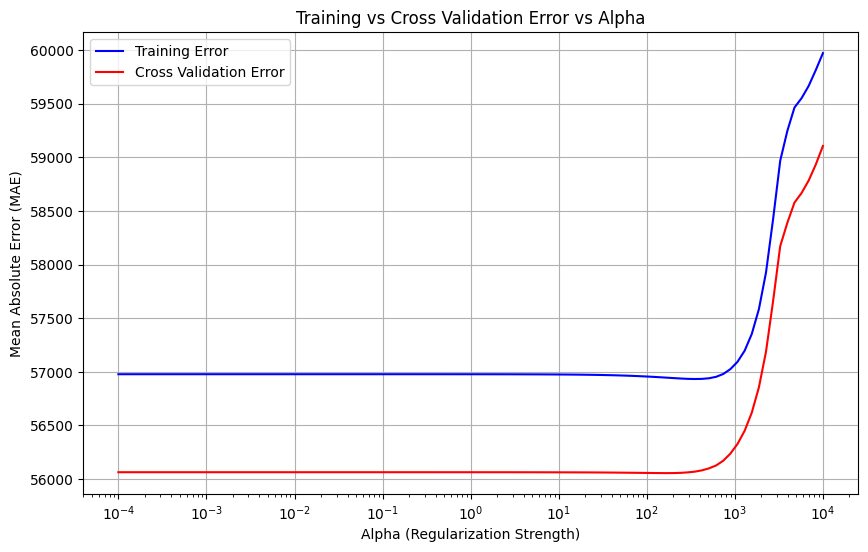

In [210]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of alpha values to test
alphas = np.logspace(-4, 4, 100)

# Store the training and CV errors for each alpha value
train_errors = []
cv_errors = []

# Loop through each alpha value
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    
    # Calculate training error
    train_pred = lasso.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_mae)
    
    # Calculate CV error (on the CV set)
    cv_pred = lasso.predict(X_cv)
    cv_mae = mean_absolute_error(y_cv, cv_pred)
    cv_errors.append(cv_mae)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training Error', color='blue')
plt.plot(alphas, cv_errors, label='Cross Validation Error', color='red')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training vs Cross Validation Error vs Alpha')
plt.legend()
plt.grid(True)
plt.show()


**The plot shows that the minima for the cross-validation error occurs between alpha values of 100 and 1000. Therefore, the best alpha predicted by GridSearchCV, which is 200, aligns with this observation and is indeed a correct choice. This indicates that a moderate regularization strength helps achieve the optimal balance between bias and variance for the mode**

**tetsing on new test set***

In [217]:
test_data=pd.read_csv('california_housing_test.csv')

In [218]:
test_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

In [219]:
test_data_feature_engineered = test_data.copy()

# Create new ratio-based features
test_data_feature_engineered['rooms_per_household'] = test_data_feature_engineered['total_rooms'] / test_data_feature_engineered['households']
test_data_feature_engineered['population_per_household'] = test_data_feature_engineered['population'] / test_data_feature_engineered['households']

# Drop the original columns (optional)
test_data_feature_engineered.drop(columns=['total_rooms', 'population', 'households'], inplace=True)

# Display the updated feature set
test_data_feature_engineered.head()


longitude  latitude  housing_median_age  total_bedrooms  median_income  \
0    -122.05     37.37                27.0           661.0         6.6085   
1    -118.30     34.26                43.0           310.0         3.5990   
2    -117.81     33.78                27.0           507.0         5.7934   
3    -118.36     33.82                28.0            15.0         6.1359   
4    -119.67     36.33                19.0           244.0         2.9375   

   median_house_value  rooms_per_household  population_per_household  
0            344700.0             6.410891                  2.536304  
1            176500.0             5.451264                  2.920578  
2            270500.0             7.250505                  2.997980  
3            330000.0             6.090909                  4.454545  
4             81700.0             5.236287                  3.586498

In [221]:
# Define number of bins
num_bins = 5  

# Create categorical latitude and longitude bins for the test data
test_data_feature_engineered['lat_category'] = pd.cut(test_data['latitude'], bins=num_bins, labels=False)
test_data_feature_engineered['lon_category'] = pd.cut(test_data['longitude'], bins=num_bins, labels=False)

# One-hot encode the categories
test_data_feature_engineered = pd.get_dummies(test_data_feature_engineered, columns=['lat_category', 'lon_category'])

# Drop raw lat/lon
test_data_feature_engineered.drop(columns=['latitude', 'longitude'], inplace=True)

# Show sample results
test_data_feature_engineered.head()


housing_median_age  total_bedrooms  median_income  median_house_value  \
0                27.0           661.0         6.6085            344700.0   
1                43.0           310.0         3.5990            176500.0   
2                27.0           507.0         5.7934            270500.0   
3                28.0            15.0         6.1359            330000.0   
4                19.0           244.0         2.9375             81700.0   

   rooms_per_household  population_per_household  lat_category_0  \
0             6.410891                  2.536304           False   
1             5.451264                  2.920578            True   
2             7.250505                  2.997980            True   
3             6.090909                  4.454545            True   
4             5.236287                  3.586498           False   

   lat_category_1  lat_category_2  lat_category_3  lat_category_4  \
0           False            True           False           False   
1           False           False           False           False   
2           False           False           False           False   
3           False           False           False           False   
4           False            True           False           False   

   lon_category_0  lon_category_1  lon_category_2  lon_category_3  \
0           False            True           False           False   
1           False           False           False            True   
2           False           False           False            True   
3           False           False           False            True   
4           False           False            True           False   

   lon_category_4  
0           False  
1           False  
2           False  
3           False  
4           False

In [222]:
# Backup original lat/lon features before dropping
test_data_feature_engineered["lat_category_high"] = test_data_feature_engineered["lat_category_0"]
test_data_feature_engineered["lon_category_high"] = test_data_feature_engineered["lon_category_0"]

test_data_feature_engineered["lat_category_low"] = test_data_feature_engineered["lat_category_3"] + \
                                                    test_data_feature_engineered["lat_category_4"]
test_data_feature_engineered["lon_category_low"] = test_data_feature_engineered["lon_category_3"] + \
                                                    test_data_feature_engineered["lon_category_4"]

# Drop only the old categorical columns
lat_lon_cols = [col for col in test_data_feature_engineered.columns if "lat_category_" in col or "lon_category_" in col]
lat_lon_cols.remove("lat_category_high")
lat_lon_cols.remove("lon_category_high")
lat_lon_cols.remove("lat_category_low")
lat_lon_cols.remove("lon_category_low")

test_data_feature_engineered.drop(columns=lat_lon_cols, inplace=True)

# Debugging: Print columns after transformation
print("After transformation:", test_data_feature_engineered.columns)

# Show updated dataset
print(test_data_feature_engineered.head())


After transformation: Index(['housing_median_age', 'total_bedrooms', 'median_income',
       'median_house_value', 'rooms_per_household', 'population_per_household',
       'lat_category_high', 'lon_category_high', 'lat_category_low',
       'lon_category_low'],
      dtype='object')
   housing_median_age  total_bedrooms  median_income  median_house_value  \
0                27.0           661.0         6.6085            344700.0   
1                43.0           310.0         3.5990            176500.0   
2                27.0           507.0         5.7934            270500.0   
3                28.0            15.0         6.1359            330000.0   
4                19.0           244.0         2.9375             81700.0   

   rooms_per_household  population_per_household  lat_category_high  \
0             6.410891                  2.536304              False   
1             5.451264                  2.920578               True   
2             7.250505                  2.997

In [223]:
# Convert boolean values to integers (0/1) for the test dataset
test_data_feature_engineered["lat_category_high"] = test_data_feature_engineered["lat_category_high"].astype(int)
test_data_feature_engineered["lon_category_high"] = test_data_feature_engineered["lon_category_high"].astype(int)
test_data_feature_engineered["lat_category_low"] = test_data_feature_engineered["lat_category_low"].astype(int)
test_data_feature_engineered["lon_category_low"] = test_data_feature_engineered["lon_category_low"].astype(int)

# Debug: Print updated dataset
print(test_data_feature_engineered.head())


   housing_median_age  total_bedrooms  median_income  median_house_value  \
0                27.0           661.0         6.6085            344700.0   
1                43.0           310.0         3.5990            176500.0   
2                27.0           507.0         5.7934            270500.0   
3                28.0            15.0         6.1359            330000.0   
4                19.0           244.0         2.9375             81700.0   

   rooms_per_household  population_per_household  lat_category_high  \
0             6.410891                  2.536304                  0   
1             5.451264                  2.920578                  1   
2             7.250505                  2.997980                  1   
3             6.090909                  4.454545                  1   
4             5.236287                  3.586498                  0   

   lon_category_high  lat_category_low  lon_category_low  
0                  0                 0                 0 

In [224]:
test_data_feature_engineered.drop(columns=["lon_category_low"], inplace=True)

In [227]:
# Ensure the test data features match the training data features
X_test = test_data_feature_engineered.drop(columns=['median_house_value'])  # Drop the target column from test features
y_true_test = test_data['median_house_value']  # True values for the test set

# Make predictions on the test set using the trained Lasso model
y_pred_test = best_lasso.predict(X_test)

# Calculate the evaluation metrics
mae_test = mean_absolute_error(y_true_test, y_pred_test)
mse_test = mean_squared_error(y_true_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_true_test, y_pred_test)

# Print the results
print(f"Test Set -> MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


Test Set -> MAE: 56788.9110, MSE: 5823943162.2528, RMSE: 76314.7637, R²: 0.5447


**"The cross-validation (CV) and training set errors are almost identical, which indicates that our model is generalizing well and not overfitting. This suggests that the model is making accurate predictions on house prices, both on the training data and unseen data (CV set).**